# Telecom Churn Assignment

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Dataset 
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively

### Business Goal 
To build predictive models to identify customers at high risk of churn and identify the main indicators of usage based churn
###### 'churn' prediction
The objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.This is to be done for High-value customers who have recharged with an amount more than or equal to 70th percentile of the average recharge amount for the months of June and July.
###### Identify important factors for 'churn'
To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks

 



## Step 1: Reading the Data
Import required libraries and read the customer dataset for telecom churn

In [121]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
# Import the required classes and libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import (confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,
f1_score,auc,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from xgboost import XGBClassifier

In [123]:
# Define custome class to print the output in various colours 
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [124]:
# Set option to display all rows in the output
pd.set_option('display.max_rows',None)

In [125]:
# Read the input file
tele_df = pd.read_csv("telecom_churn_data.csv")
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


###### Inspect the various aspects of the telecom dataframe, to obtain an overview of the data

In [126]:
# Identify the number of rows and columns in the dataframe
tele_df.shape

(99999, 226)

In [127]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [128]:
tele_df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

We have 99,999 samples and 226 features in the input dataset. Of the 226 features 214 are numeric and 12 are object datatypes

In [129]:
tele_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Most of the columns have a big difference in value between the 75th quantile and the maximum value. So, these have to be treated for outliers later on.

## Step 2: Cleaning the Data

#### Drop columns 

Let us drop the date related columns as we are not performing any time-series analysis and they are not required for prediction

In [130]:
object_cols = (tele_df.select_dtypes(include='object')).columns.to_list()
tele_df.drop(object_cols,inplace=True,axis=1)
tele_df.shape

(99999, 214)

Now, let us check the unique values present in each column, as it will give us an indication if a column is relevent or not

In [131]:
tele_df.nunique().sort_values()

std_ic_t2o_mou_6          1
std_ic_t2o_mou_9          1
std_og_t2c_mou_9          1
std_og_t2c_mou_8          1
std_og_t2c_mou_7          1
std_og_t2c_mou_6          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_8          1
loc_ic_t2o_mou            1
std_og_t2o_mou            1
loc_og_t2o_mou            1
circle_id                 1
fb_user_8                 2
fb_user_7                 2
fb_user_6                 2
night_pck_user_9          2
night_pck_user_6          2
night_pck_user_7          2
night_pck_user_8          2
fb_user_9                 2
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_8             12
monthly_3g_6             12
monthly_3g_7             15
sachet_3g_6              25
count_rech_3g_6          25
count_rech_3g_9          27
sachet_3g_7              27
sachet_3g_9              27
count_rech_3g_7          28
sachet_3g_8              29
count_rech_3g_8     

We can see that there are 16 columns with just a single value. Columns with only a single value throughout can be dropped straightaway.
Columns with 2 unique values are kind of categorical with Yes or No being indicated by 1 and 0. So, they need not be dropped.

In [132]:
for col in tele_df.columns:
    if tele_df[col].nunique() == 1:
        tele_df.drop(col,inplace=True,axis=1)

In [133]:
tele_df.shape

(99999, 202)

Also, the column 'mobile_number' is not required as it is like a unique id corresponding to each customer and will not be required for the prediction.

In [134]:
tele_df.drop('mobile_number',inplace=True,axis=1)

#### Handle null values

In [135]:
# Let us check if any rows have all missing values
tele_df.isnull().all(axis=1).sum()

0

Thus, there are no rows having all missing values.

Now, Let us check identify columns that have missing values and get the count of null values in each column

In [136]:
tele_df.isnull().any().sum()

144

In [137]:
((tele_df.isnull().sum()/len(tele_df))*100).sort_values(ascending=False)

night_pck_user_6      74.846748
total_rech_data_6     74.846748
av_rech_amt_data_6    74.846748
count_rech_2g_6       74.846748
arpu_2g_6             74.846748
fb_user_6             74.846748
count_rech_3g_6       74.846748
arpu_3g_6             74.846748
max_rech_data_6       74.846748
night_pck_user_7      74.428744
arpu_2g_7             74.428744
max_rech_data_7       74.428744
count_rech_2g_7       74.428744
arpu_3g_7             74.428744
fb_user_7             74.428744
count_rech_3g_7       74.428744
av_rech_amt_data_7    74.428744
total_rech_data_7     74.428744
arpu_2g_9             74.077741
arpu_3g_9             74.077741
total_rech_data_9     74.077741
max_rech_data_9       74.077741
fb_user_9             74.077741
av_rech_amt_data_9    74.077741
count_rech_3g_9       74.077741
count_rech_2g_9       74.077741
night_pck_user_9      74.077741
arpu_3g_8             73.660737
arpu_2g_8             73.660737
count_rech_3g_8       73.660737
night_pck_user_8      73.660737
count_re

We can see that we have 144 columns which have null values.

Out of these many columns related to data have a very high number of null values(more than 73%)

But, on checking these null value columns it can be seen that the missing values can be imputed and need not be dropped. This is because these missing values are a result of the customer not availing or using the particular service/feature.

These are :
* Number of incoming, Outgoing calls in various categories
* Data usage in 2g,3g
* Count, Amount and Date of Recharge
* Average revenue per user
* FB,Night pack and other services

It can be seen that all related variables have the same number of null values. Hence for all the features related to these variables, the missing values can be represented by a value of 0.

In [138]:
# Now, we can go ahead and fill all the other missing values with 0
tele_df.fillna(0,inplace=True)

In [139]:
tele_df.isnull().any().sum()

0

###### <span style='background:yellow'> We do not have any missing values in the dataframe now  </span>

Now let us have a look at the data types of all the features and convert any, if necessary

In [140]:
tele_df.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2f_mou_9      float64
loc_og_t2c_mou_6      float64
loc_og_t2c

#### Rename Columns which are not of the standard format

Few columns do not have the standard suffix of _6,_7,_8 and _9 and instead have the month names as prefix. We will rename these columns appropriately.

Also, few columns related to recharge have the keyword as 'rch' instead of 'rech'. These need to be renamed as well.

In [141]:
tele_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 
                        'sep_vbc_3g': 'vbc_3g_9','last_day_rch_amt_6':'last_day_rech_amt_6',
                       'last_day_rch_amt_7':'last_day_rech_amt_7','last_day_rch_amt_8':'last_day_rech_amt_8',
                       'last_day_rch_amt_9':'last_day_rech_amt_9'}, inplace=True)

#### Create new features

In [142]:
tele_df['total_rech_amt_data_6'] = tele_df['av_rech_amt_data_6'] * tele_df['total_rech_data_6']
tele_df['total_rech_amt_data_7'] = tele_df['av_rech_amt_data_7'] * tele_df['total_rech_data_7']
tele_df['total_rech_amt_data_8'] = tele_df['av_rech_amt_data_8'] * tele_df['total_rech_data_8']
tele_df['total_rech_amt_data_9'] = tele_df['av_rech_amt_data_9'] * tele_df['total_rech_data_9']

### Lets us extract the rows which are for high-value customers, as we will only need this for our model building

High-Value Customers are those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the months of June(6) and July(7).

We will calculate the average recharge amount for months 6 and 7 combined as follows:

###### Total Amount recharged for the months / Number of recharges done for these months

In [143]:
 tele_df['av_rech_amt_6_7'] = (tele_df['total_rech_amt_6'] + tele_df['total_rech_amt_data_6'] + 
                        tele_df['total_rech_amt_7'] + tele_df['total_rech_amt_data_7'])/(tele_df['total_rech_num_6'] + 
                                                                                         tele_df['total_rech_data_6'] + 
                                                                                         tele_df['total_rech_num_7'] + 
                                                                                         tele_df['total_rech_data_7'])

Since, the number of recharges might be Zero for a few customers, it will result in division by zero and hence the average recharge amount will be 'NaN'. We will replace these with Zeroes.

In [144]:
tele_df['av_rech_amt_6_7'].fillna(0,inplace=True)

In [145]:
tele_df[['av_rech_amt_6_7']].describe()

,av_rech_amt_6_7
count,99999.000000
mean,58.209335
std,64.689979
min,0.000000
25%,23.000000
50%,42.705882
75%,74.285714
max,4010.000000


In [146]:
# Calculate the 70th quantile for the average recharge amount for months 6 and 7
tele_df[['av_rech_amt_6_7']].quantile(0.7)

av_rech_amt_6_7    66.666667
Name: 0.7, dtype: float64

Now, let us extract records for thos Customers are those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the months of June(6) and July(7). 

In [147]:
highval_df = tele_df.loc[tele_df['av_rech_amt_6_7'] >= tele_df.av_rech_amt_6_7.quantile(0.7)]

In [148]:
highval_df.shape

(30040, 206)

So, we have **30,040** high-value customers

In [149]:
# Drop the combined average recharge amount field for months 6 and 7 as it will no longer be needed
highval_df.drop('av_rech_amt_6_7',axis=1,inplace=True)

In [150]:
# Check the number of unique values in each columns after extracting the high value customers. 
#This is to drop any columns which has only 1 unique value in it.
highval_df.nunique().sort_values()

night_pck_user_6             2
night_pck_user_7             2
night_pck_user_8             2
fb_user_9                    2
fb_user_8                    2
fb_user_7                    2
fb_user_6                    2
night_pck_user_9             2
monthly_2g_9                 5
monthly_2g_6                 5
monthly_2g_8                 6
monthly_2g_7                 6
monthly_3g_9                11
monthly_3g_6                12
monthly_3g_8                12
monthly_3g_7                15
count_rech_3g_6             24
sachet_3g_6                 24
sachet_3g_9                 26
count_rech_3g_9             26
sachet_3g_7                 27
count_rech_3g_7             28
sachet_3g_8                 28
sachet_2g_9                 29
count_rech_2g_9             29
count_rech_3g_8             29
sachet_2g_6                 30
count_rech_2g_6             30
sachet_2g_8                 33
count_rech_2g_8             34
sachet_2g_7                 35
total_rech_data_9           35
count_re

### Now let us identify the Customers who have churned in September

Tag the churned customers (churn=1, else 0) based on September month as follows: 

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
The attributes we will use to use to tag churners are:
* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

In [151]:
# Create a new columns to indicate the customers who have churned
highval_df['churn_ind'] = np.where(highval_df[['total_ic_mou_9','total_og_mou_9',
                                                       'vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [152]:
highval_df['churn_ind'].value_counts()

0    27541
1     2499
Name: churn_ind, dtype: int64

So, we have <span style='color:red'>**2499**</span> high-value customers who have churned in the month of September

In [153]:
# Percentage of Churned High Value customers
(highval_df['churn_ind'].sum()/len(highval_df.index))*100

8.318908122503329

After tagging churners, we will now remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [154]:
churn_df = highval_df[highval_df.columns.drop(list(highval_df.filter(regex='_9')))]

In [155]:
churn_df.shape

(30040, 155)

In [156]:
# Create list of all variables in the dataframe
var_list=churn_df.columns
var_list

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn_ind'],
      dtype='object', length=155)

#### Drop More Variables 
We have lot of variables which are also combined to display the total values. Let us remove all such variables.

* **t2t,t2m,t2o,t2f,t2c :** These refer to minutes of usage within and between operators for local and std calls. The data from these fields are rolled up in to total minutes of usage for local and std calls.

* **arpu :** The Churn analysis is usage based and hence revenue based fields referred by 'arpu' can be dropped

* **count :** Count of recharge done for 2g and 3g. The total usage of 2g and 3g and total data recharge amount is sufficient for analysis.

* **rech_data,num,av :** Fields related to count and average of recharge done for data or calls. Since we have the total recharge amount, these fields will not be required

In [157]:
# Obtain Variables which are sub-levels
r = re.compile('.*(_t2t|_t2m|_t2o|_t2f|_t2c|arpu|count|av|num|rech_data)')
del_var = (list(filter(r.match,var_list)))

In [158]:
del_var

['arpu_6',
 'arpu_7',
 'arpu_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',

Let us drop these detail variables from the dataframe

In [159]:
churn_df.drop(del_var,axis=1,inplace=True)

In [160]:
churn_df.shape

(30040, 89)

So, we are now left with 88 columns

## Step 3: Visualising the Data

In [161]:
# Create list of all variables in the dataframe
var_list=churn_df.columns
var_list

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'las

Let us visualise the distribution of different factors in each month for Churn and No-Churn customers

First let us define functions to display different type of plots

In [162]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(feature_list):
    plt.figure(figsize=(18,6))
    df = churn_df
    plt.subplot(1,3,1)
    sns.boxplot(data=df, y=feature_list[0],x="churn_ind",
                showfliers=True,palette=("Set3"))
    plt.yscale('log')
    plt.subplot(1,3,2)
    sns.boxplot(data=df, y=feature_list[1],x="churn_ind",
                showfliers=True,palette=("Set3"))
    plt.yscale('log')
    plt.subplot(1,3,3)
    sns.boxplot(data=df, y=feature_list[2],x="churn_ind",
                showfliers=False,palette=("Set3"))
    plt.yscale('log')
    plt.show()

# create bar chart for  6th, 7th and 8th month with the mean value of each feature
def plot_mean_bar_chart(feature_list):
    df = churn_df
    df_0 = df[df.churn_ind==0].filter(feature_list)
    df_1 = df[df.churn_ind==1].filter(feature_list)
    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})
    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames) 
    mean_bar.T.plot.bar(figsize=(14,4))
    plt.show()

Let us identify the features in to different categories and create a list of column names.

On analysis of the dataset, we can categorise the features in to the following categories:
* Call related(Incoming/Outgoing)
* Recharge details(RECH)
* Data related(2g/3g)
* Availed services(PCK,NIGHT,MONTHLY,SACHET,FB)
* Age on Network(AON)

In [163]:
# Call related Variables
r = re.compile('.*(_ic|_og|ic_|og_|churn)')
call_var = (list(filter(r.match,var_list)))

# Recharge related Variables
r = re.compile('.*(rech|churn)')
recharge_var = (list(filter(r.match,var_list)))

# Data related Variables
r = re.compile('.*(2g|3g|data|churn)')
data_var = (list(filter(r.match,var_list)))

# Service related Variables
r = re.compile('.*(pck|night|monthly|sachet|fb|churn)')
service_var = (list(filter(r.match,var_list)))


#### Visualisation related to Calls

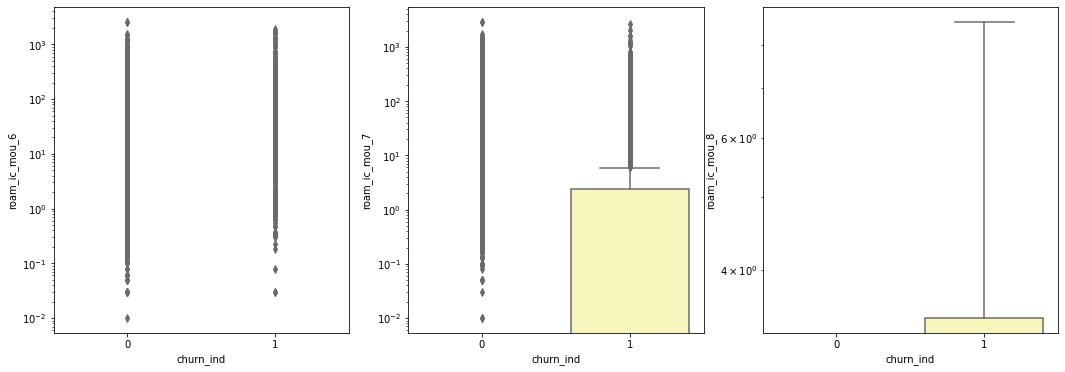

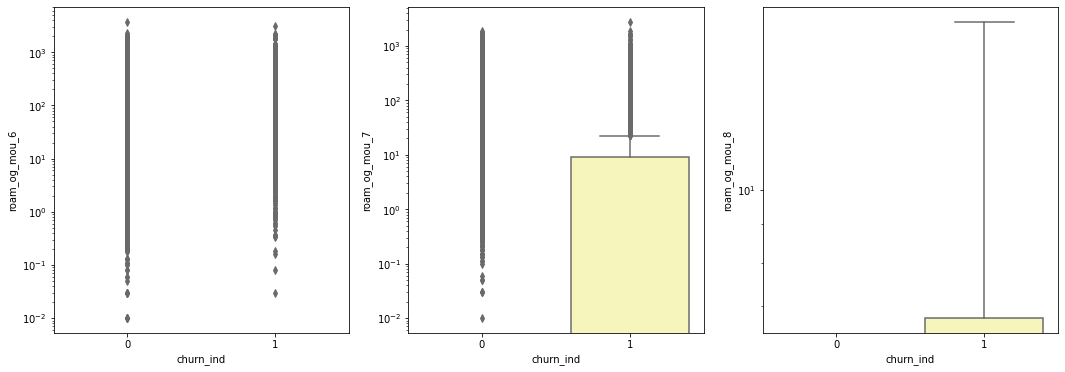

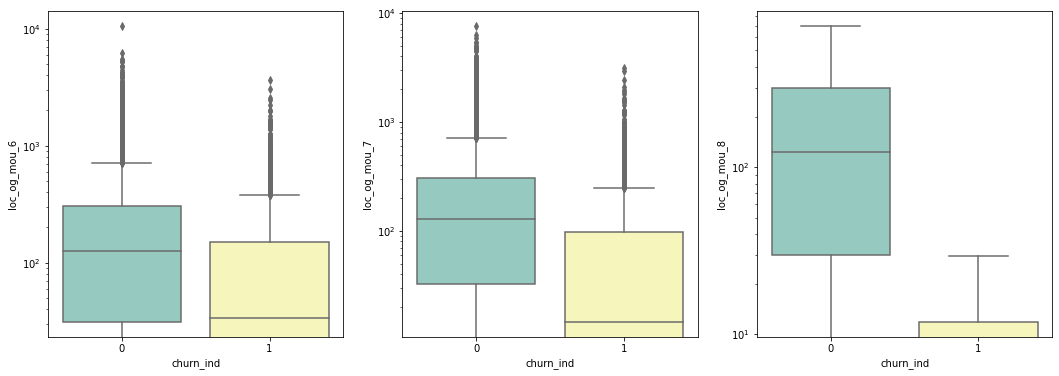

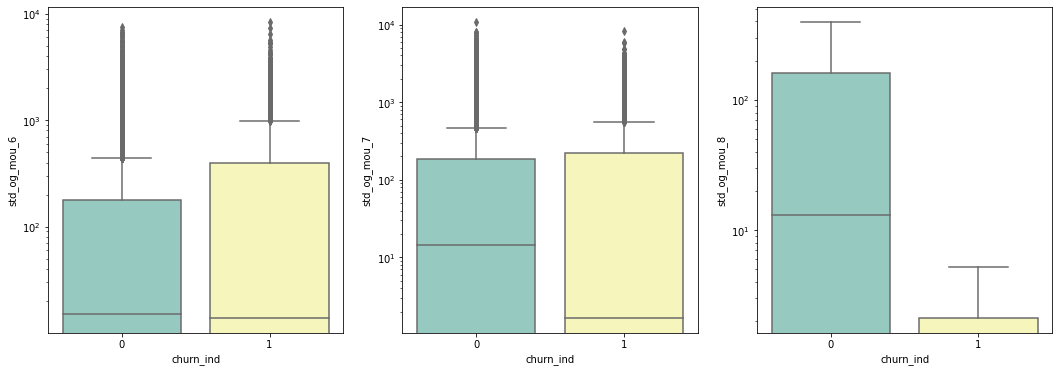

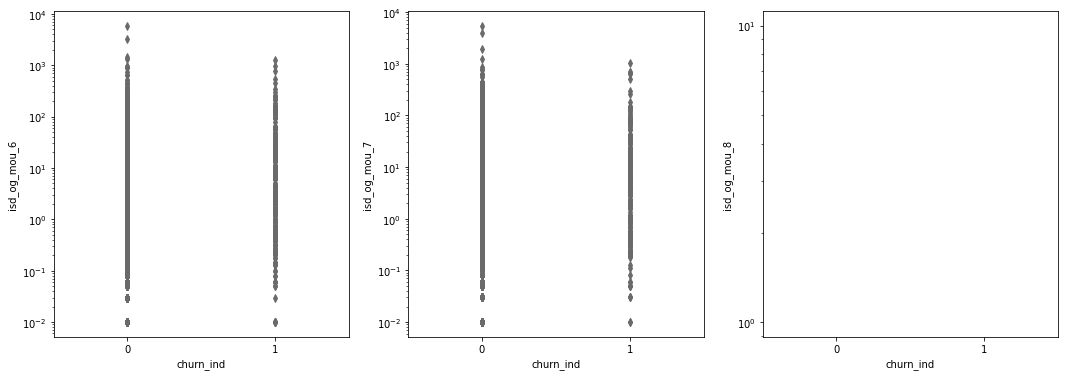

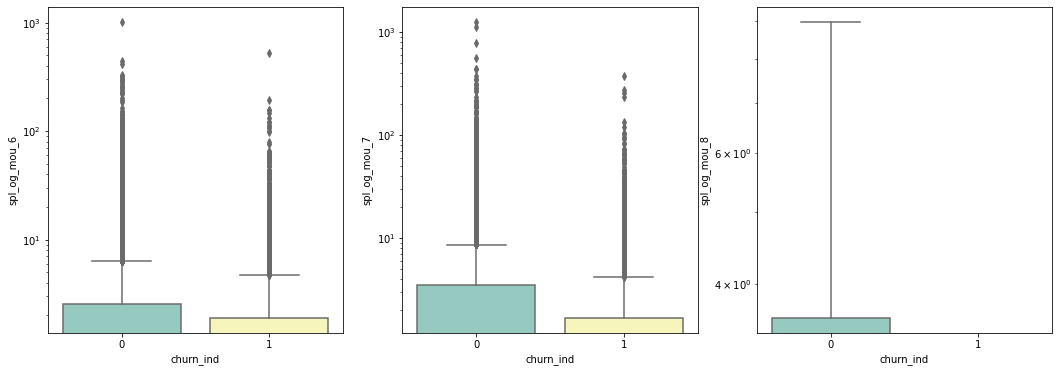

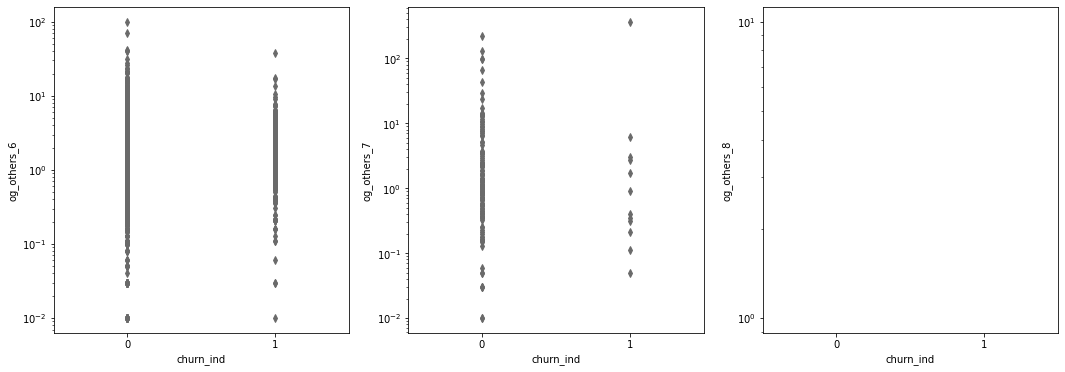

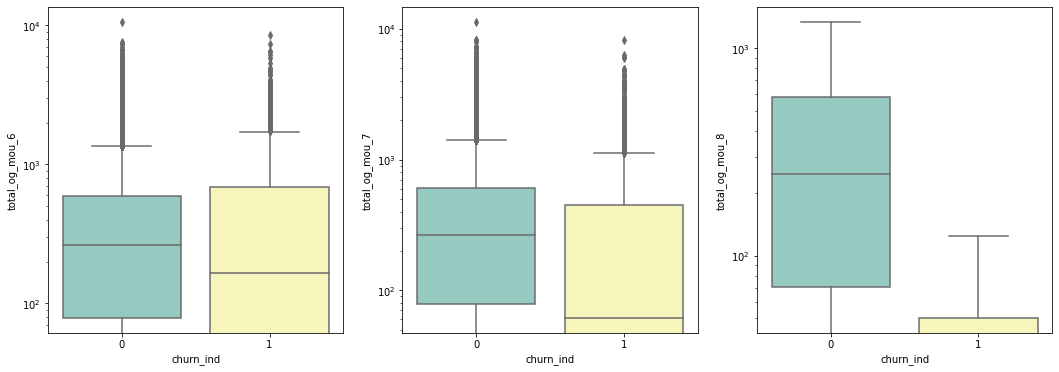

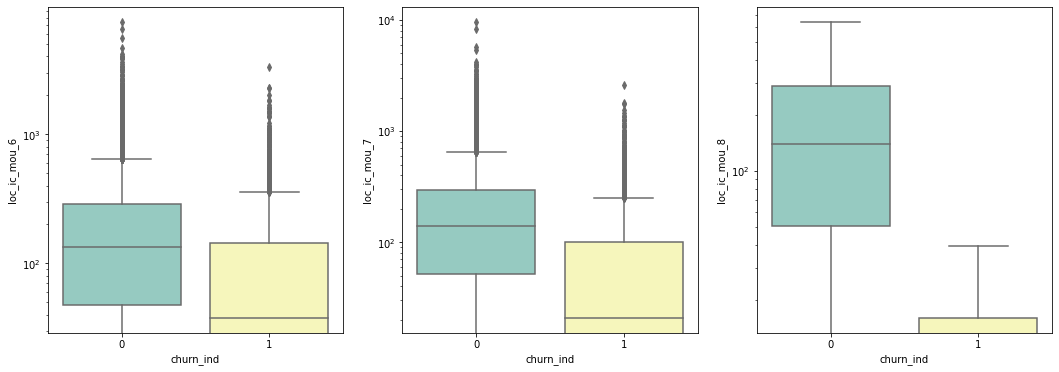

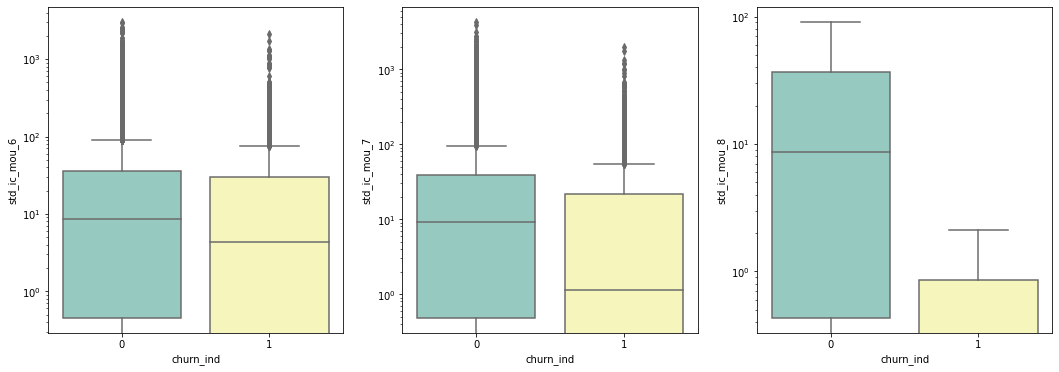

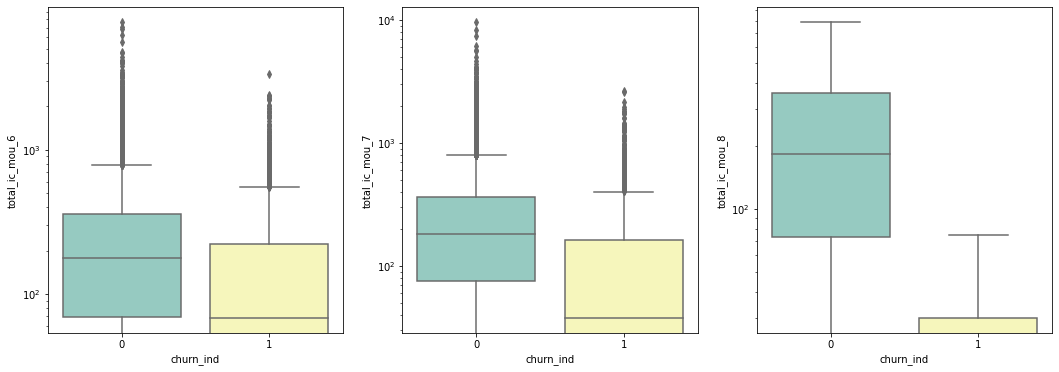

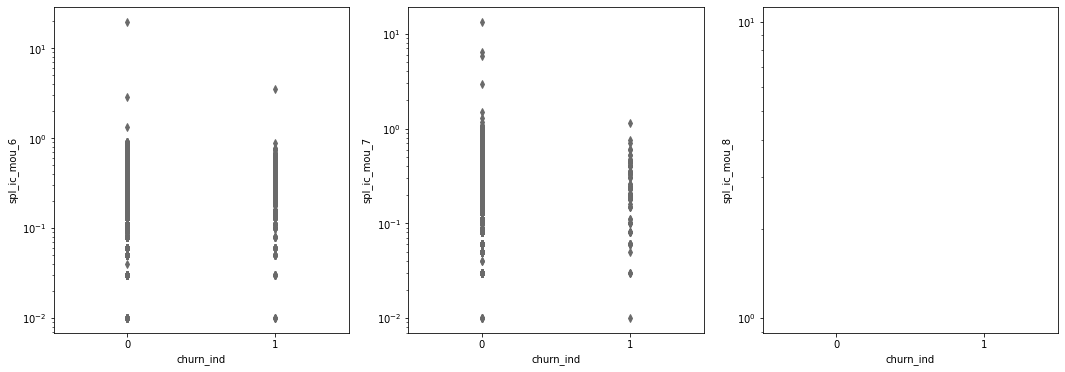

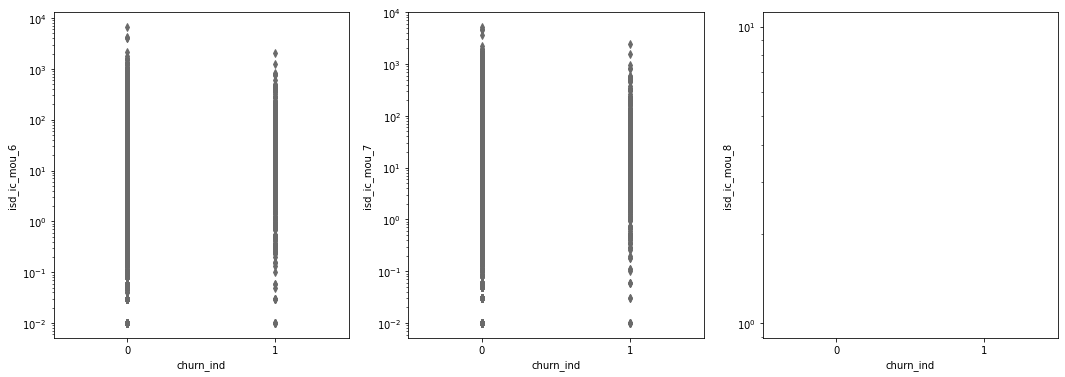

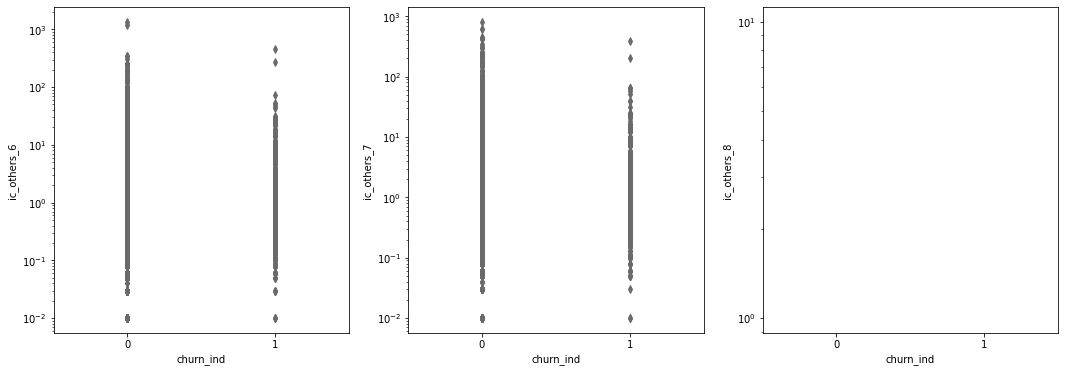

In [164]:
varlist=[]
for var in call_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_box_chart(varlist)
        varlist=[]

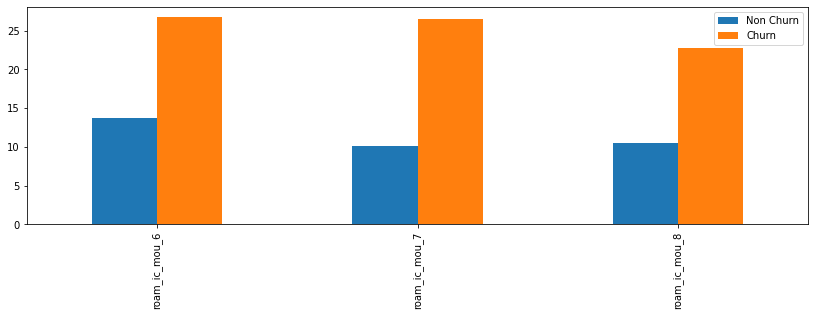

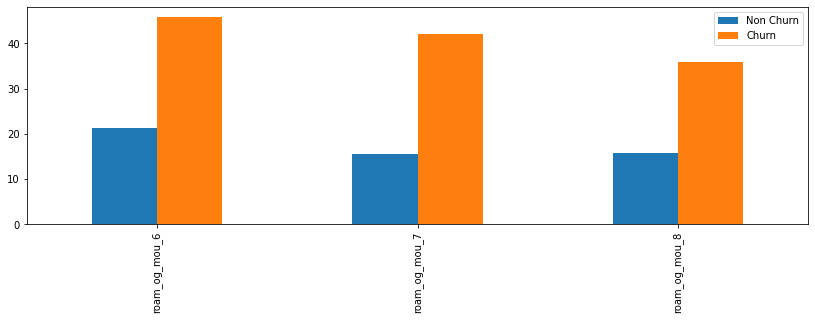

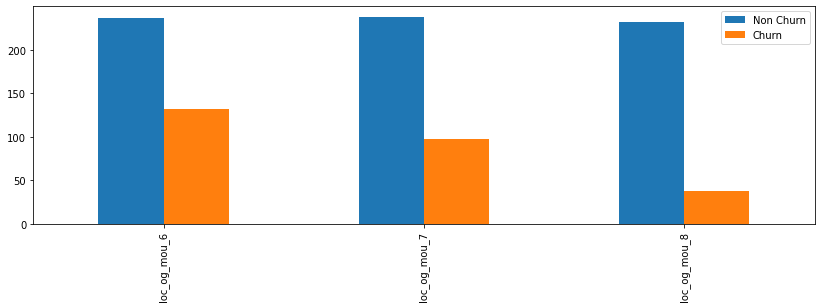

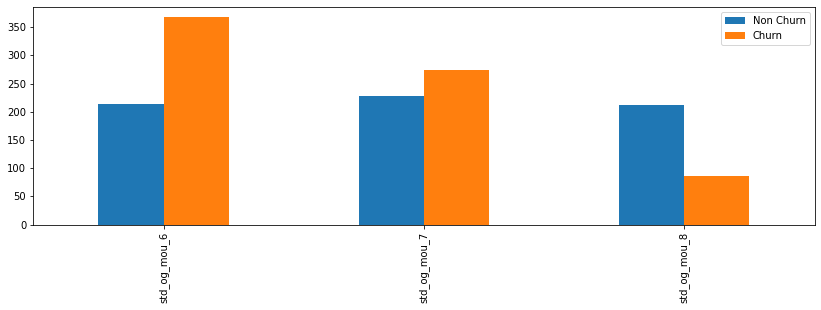

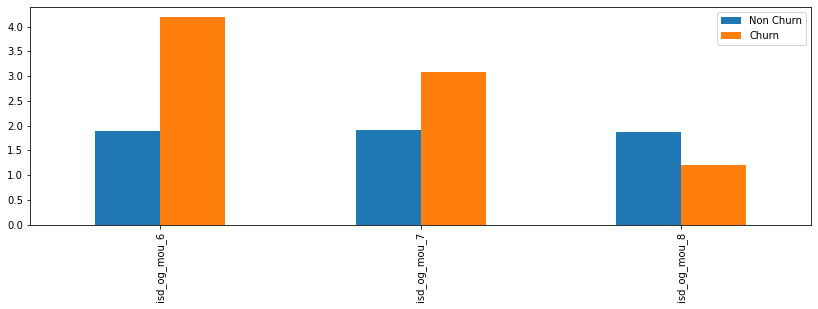

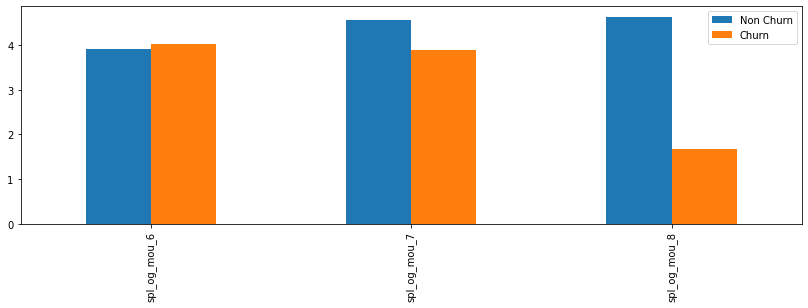

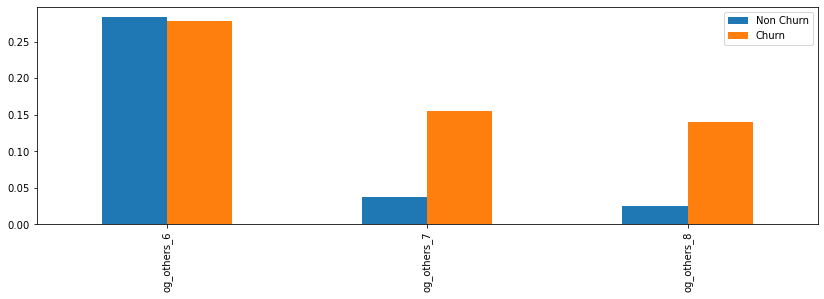

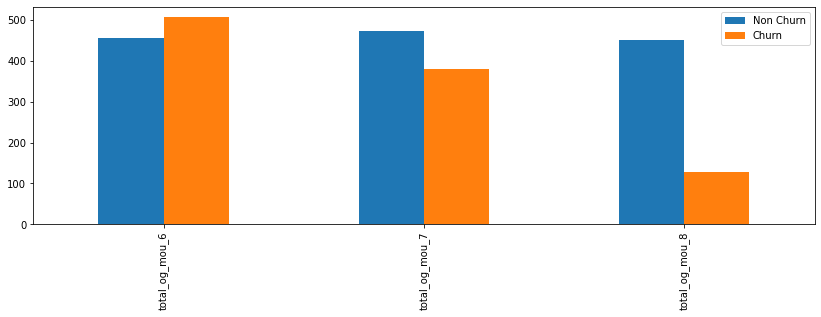

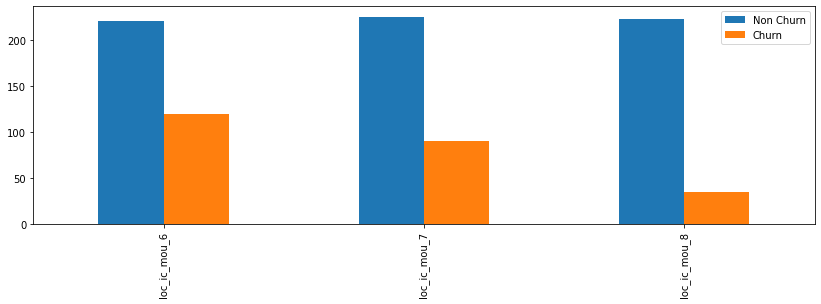

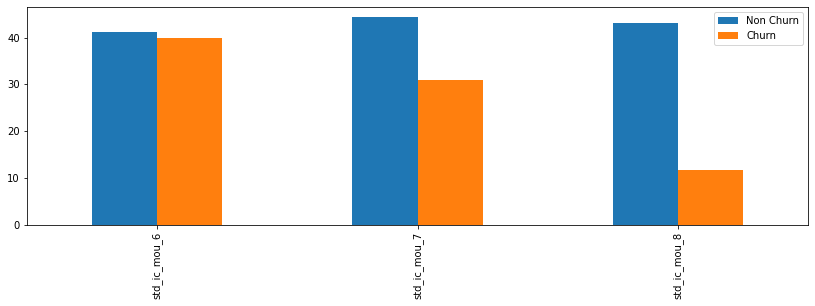

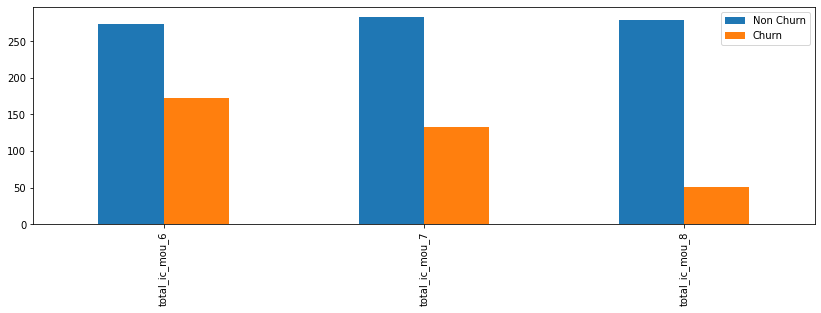

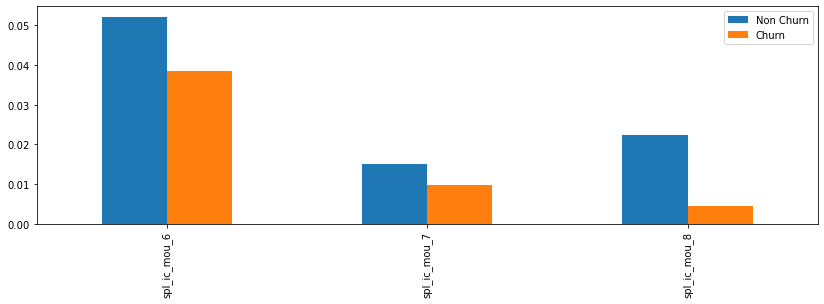

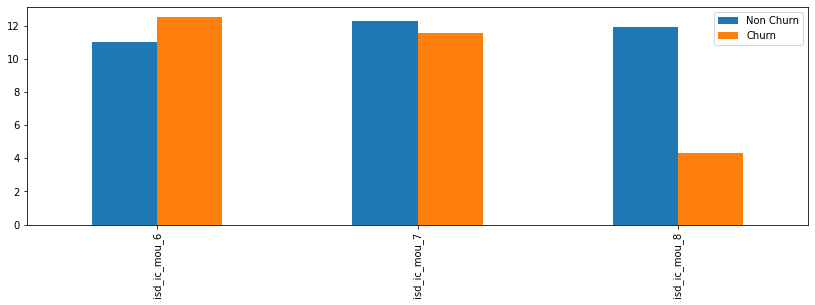

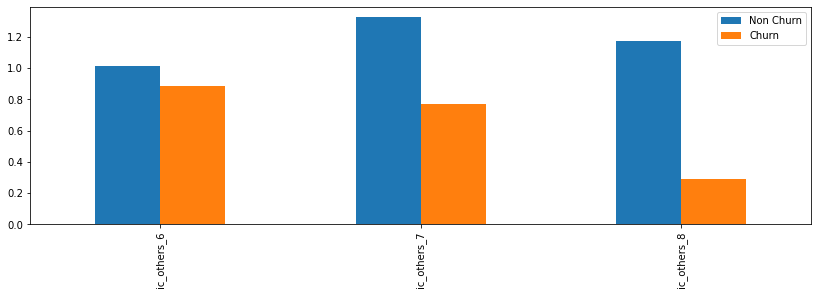

In [165]:
varlist=[]
for var in call_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_mean_bar_chart(varlist)
        varlist=[]

<span style='background:yellow'> For Churn customers,We can see that the incoming and outgoing minutes of usage decreases steadily from months 6 to 8. This is a clear indicator of a customer who is going to churn.
</span>

<span style='color:red'> We can also notice that the mean values for roaming(incoming and outgoing) are way higher for Churn customers compared to non-churn customers. This points towards a high roaming usage for churn customers. It might be a result of customers who have moved to a different telecom circle(roaming) and have later swithced to a different service provider as the roaming charges might have been high.
    
A similar trend can be seen for churn customers related to outgoing STD and ISD calls as well. So, this again could point towards customers who have churned due to high rates for std and isd.

#### Visualisation related to Recharge

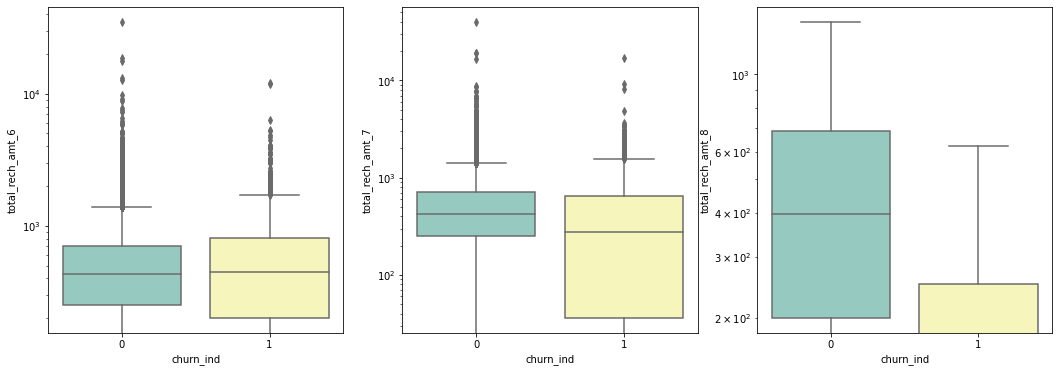

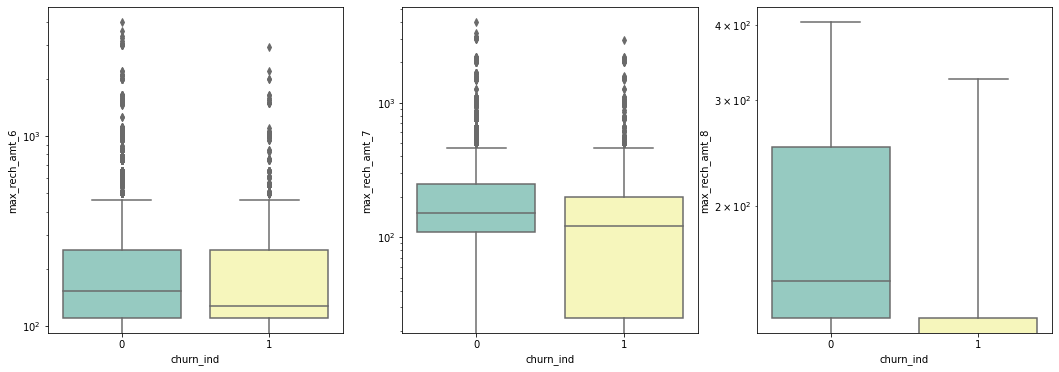

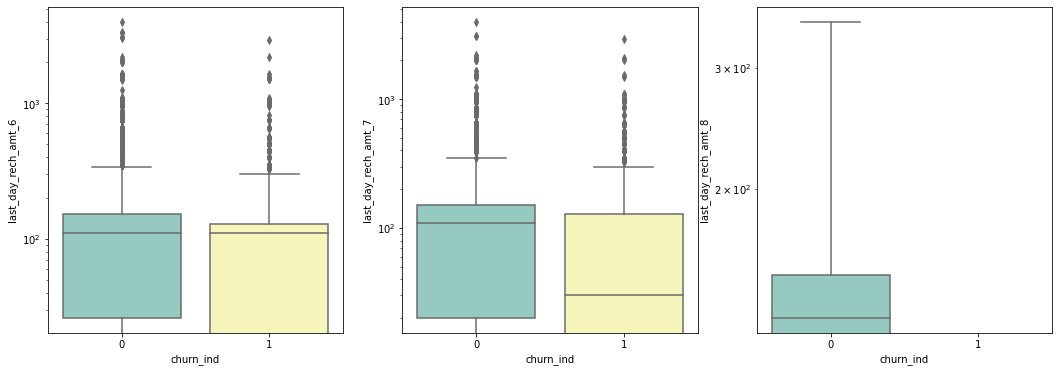

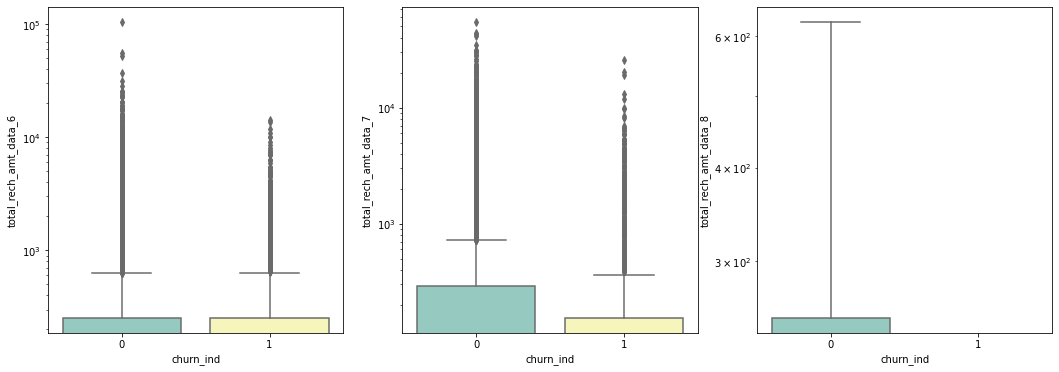

In [166]:
varlist=[]
for var in recharge_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_box_chart(varlist)
        varlist=[]


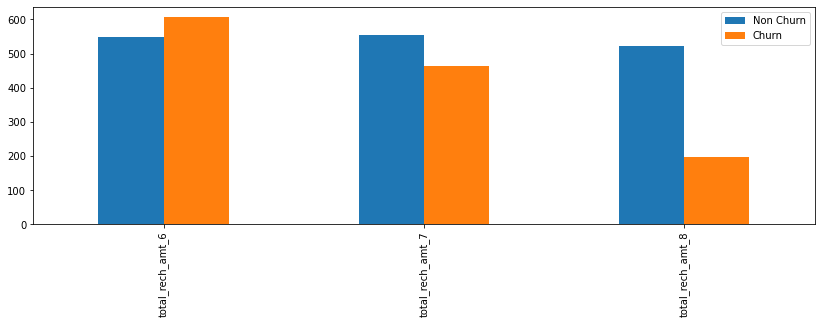

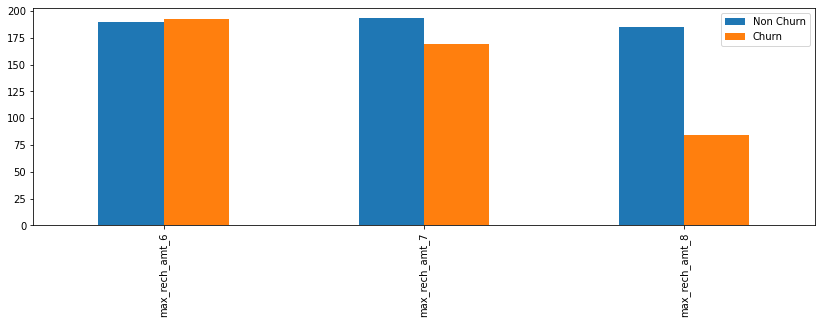

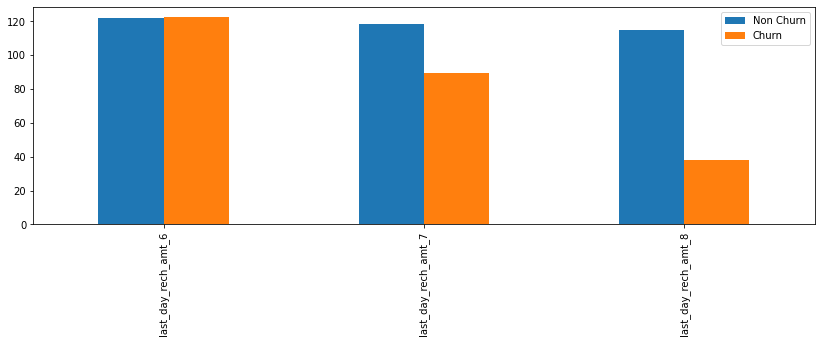

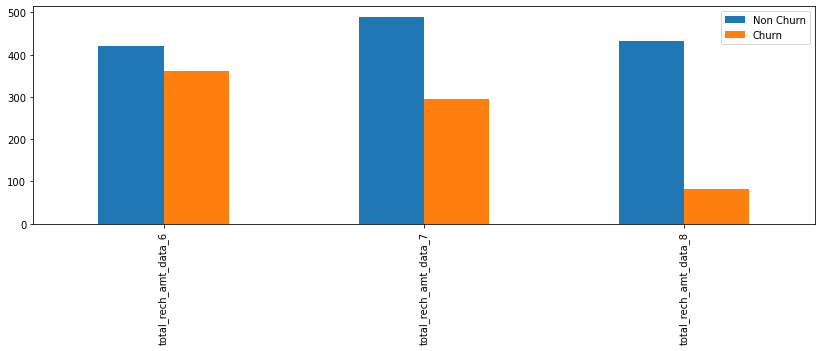

In [167]:
varlist=[]
for var in recharge_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_mean_bar_chart(varlist)
        varlist=[]

<span style='background:yellow'> For Churn customers,we can see that all variables related to recharge are decreasing from June to August. So, this is a clear trend to identify customers who are about to churn.
</span>

#### Visualisation related to Data

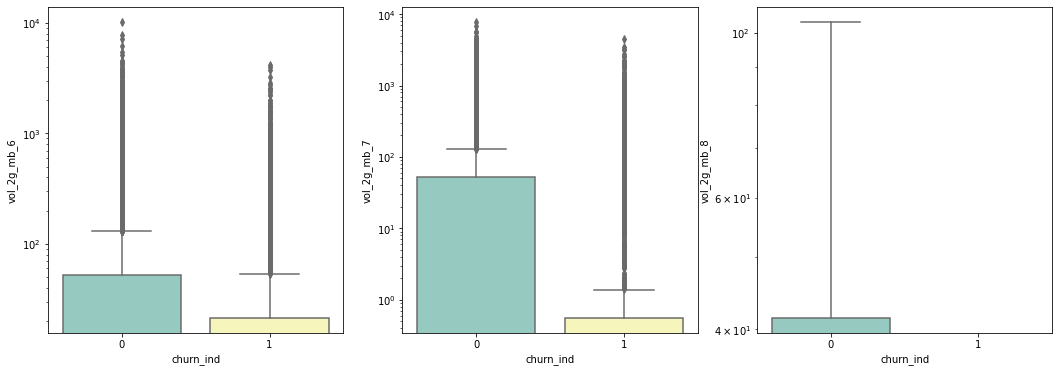

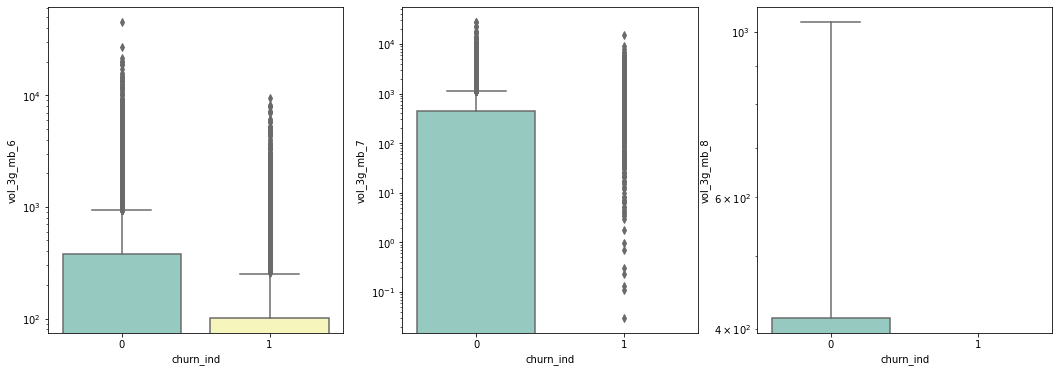

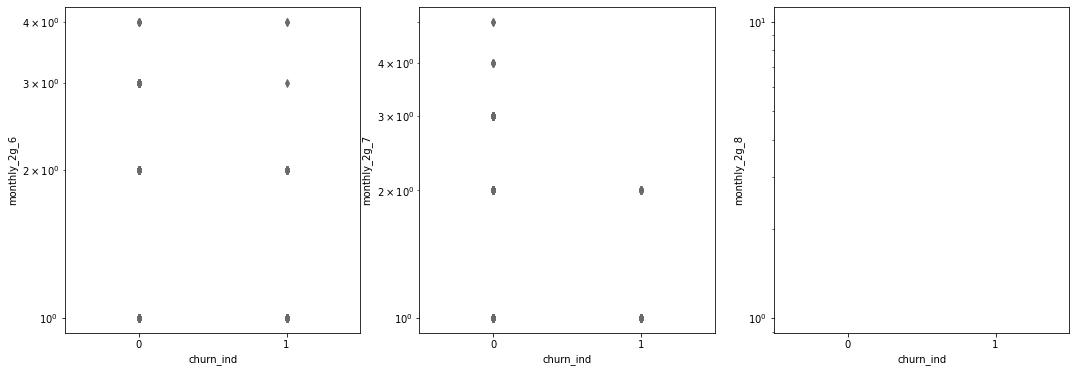

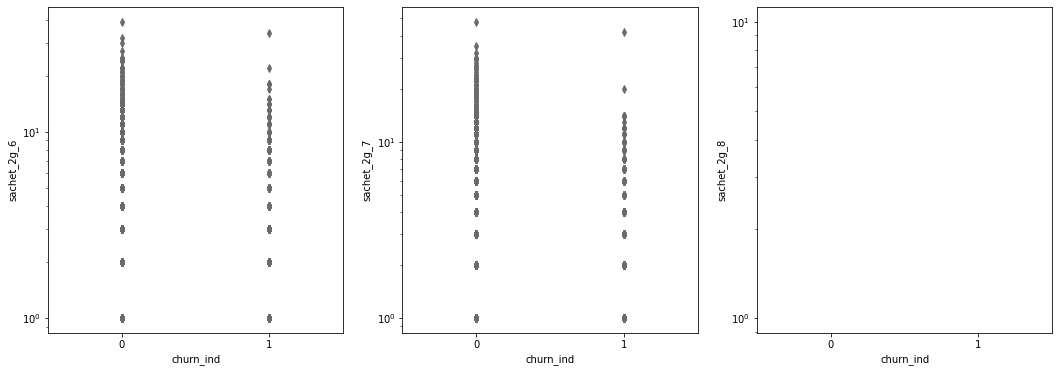

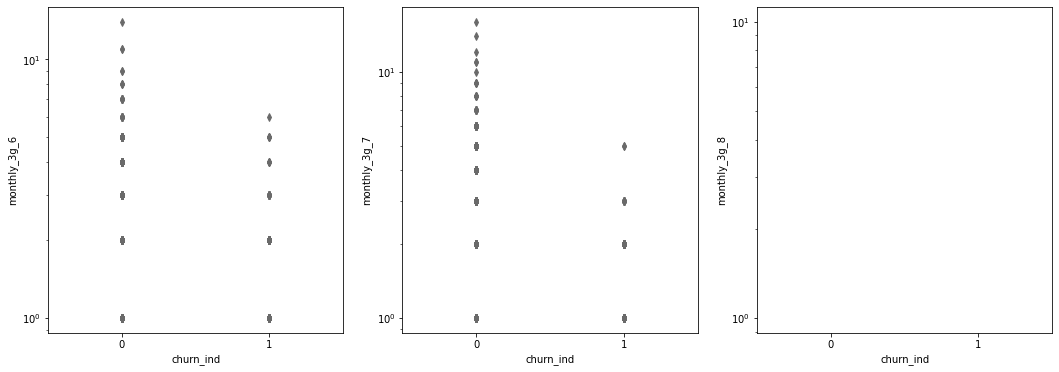

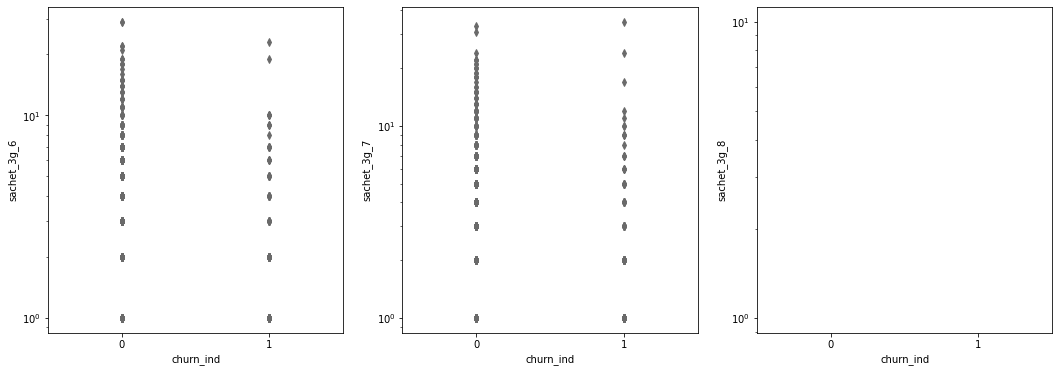

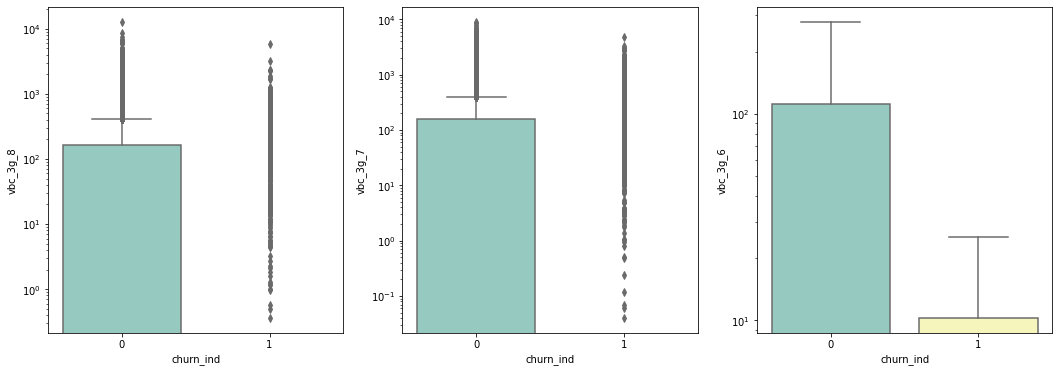

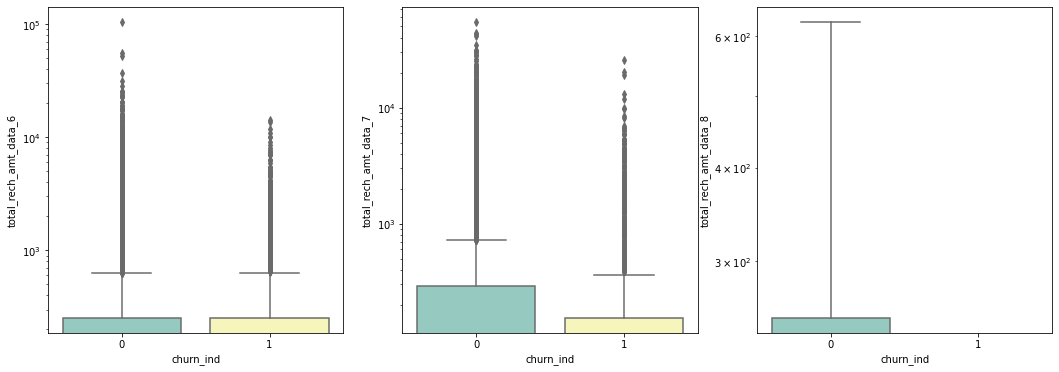

In [168]:
varlist=[]
for var in data_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_box_chart(varlist)
        varlist=[]

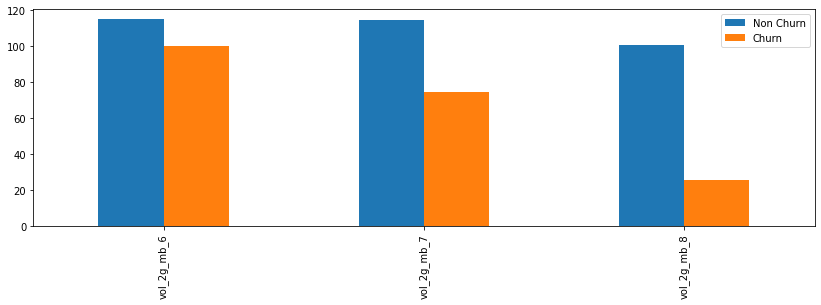

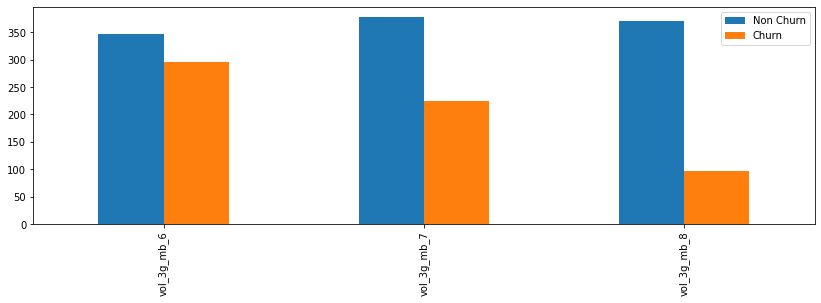

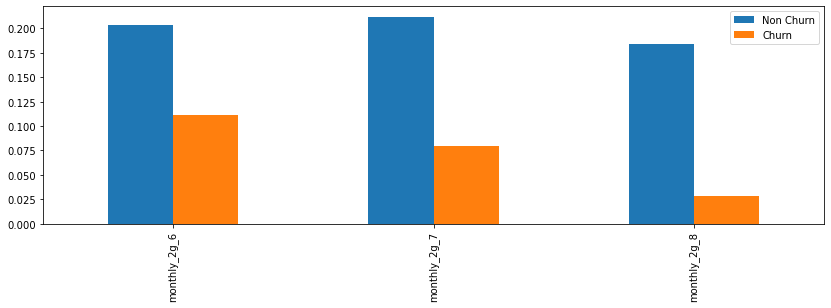

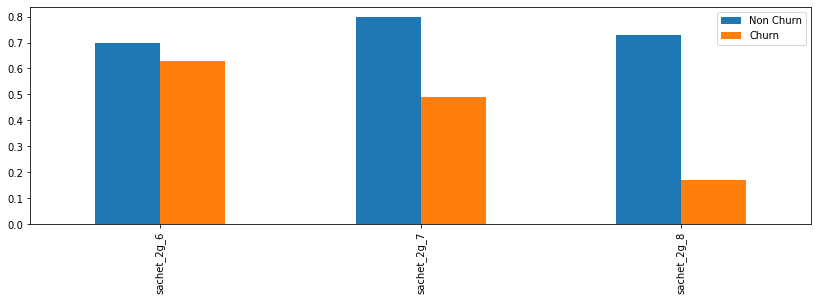

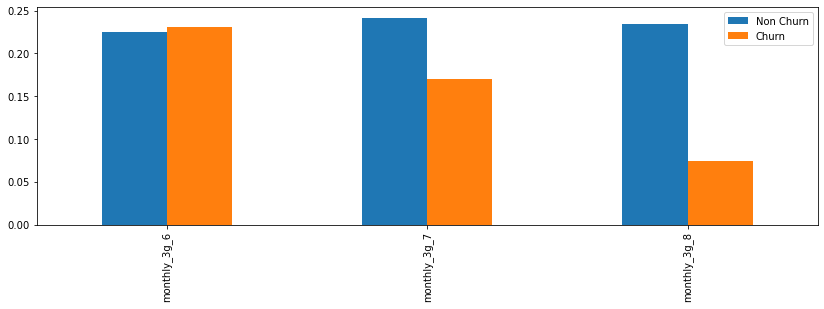

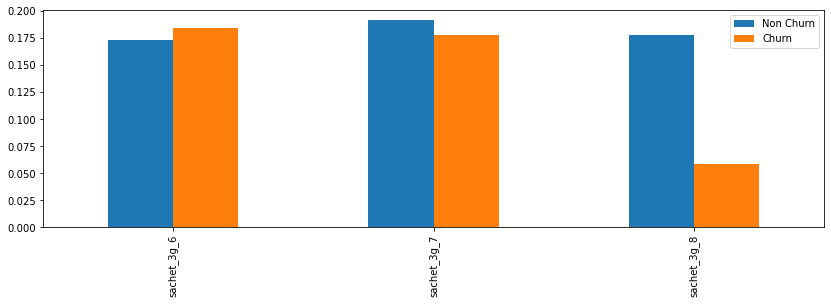

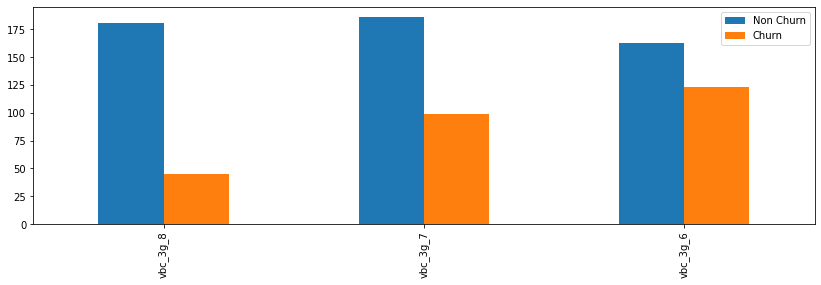

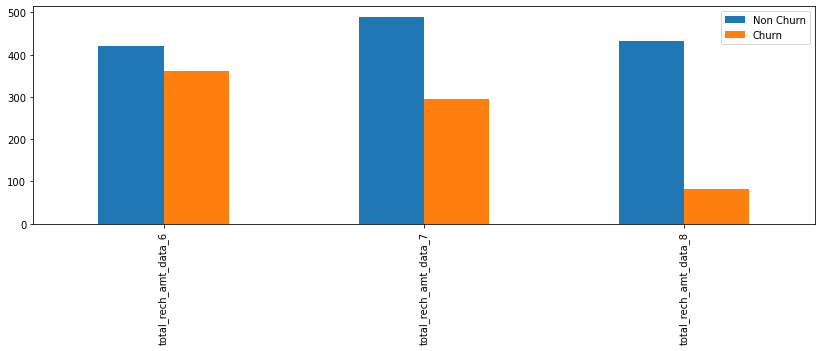

In [169]:
varlist=[]
for var in data_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_mean_bar_chart(varlist)
        varlist=[]

<span style='background:yellow'> For Churn customers,it is clear that data usage keeps decreasing from months June to August. The only exception is when customers prefer paying for the volume of data they use, rather than opting for data related schemes. This VBC(volume based cost) increases month-on-month for customers who have churned. This indicates that customers who churn, will start reducing their data usage and also opt for pay-as-you-go rather than opting for package schemes.
</span>

#### Visualisation related to Schemes Availed

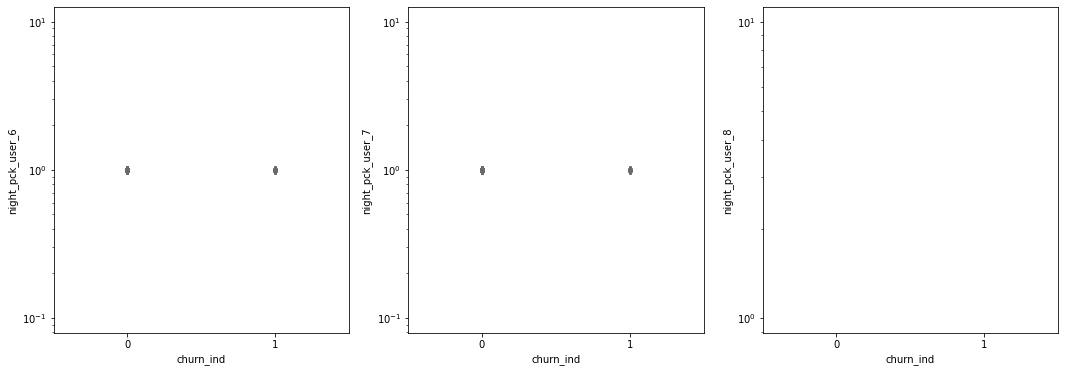

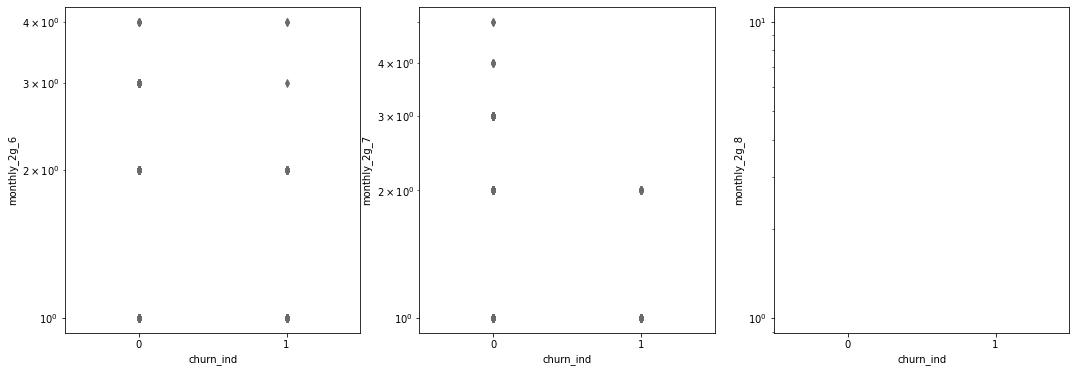

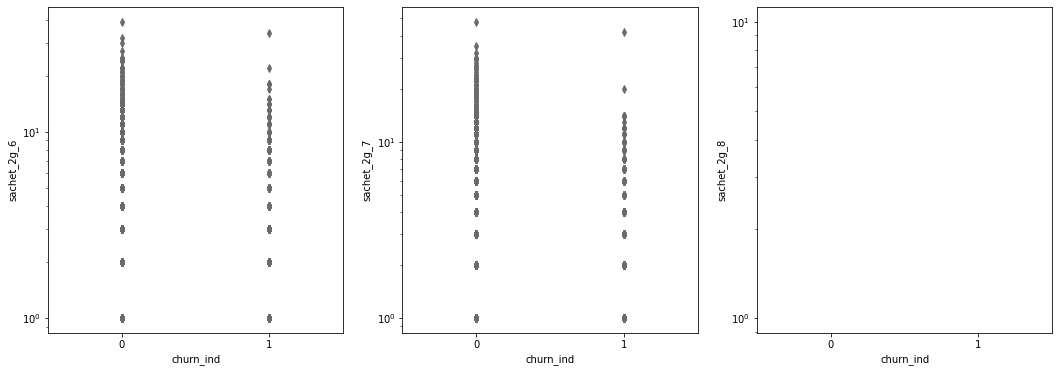

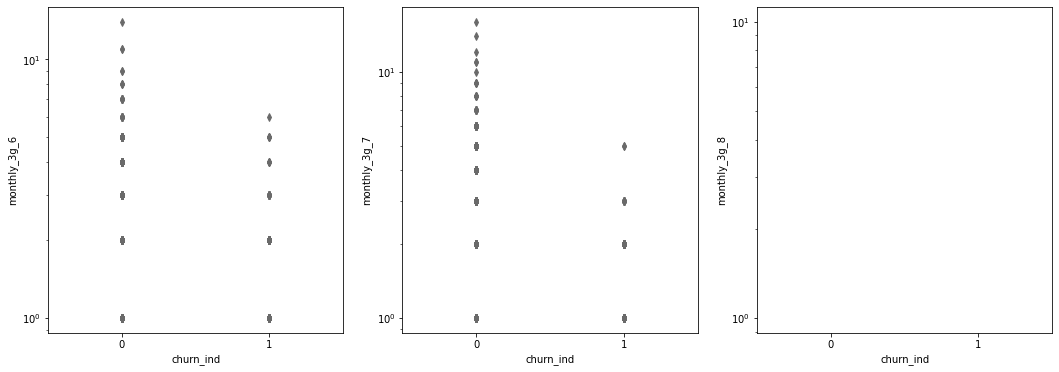

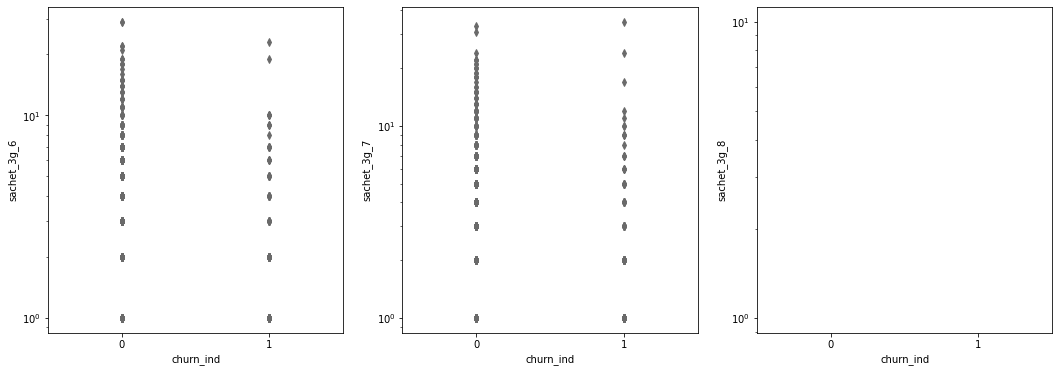

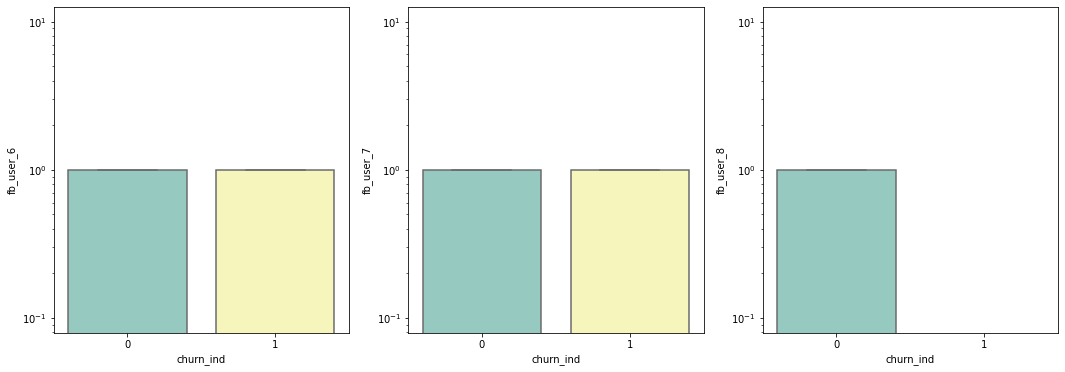

In [170]:
varlist=[]
for var in service_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_box_chart(varlist)
        varlist=[]

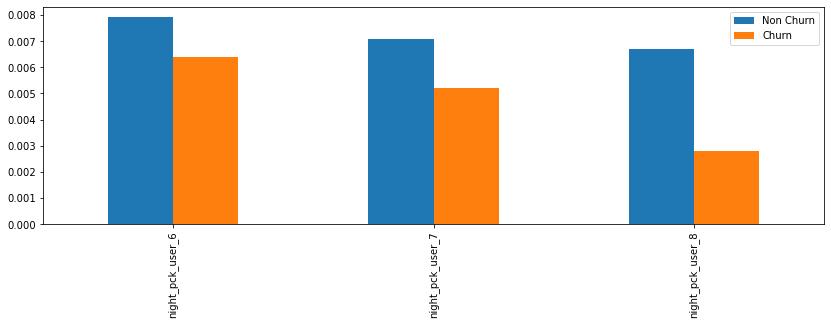

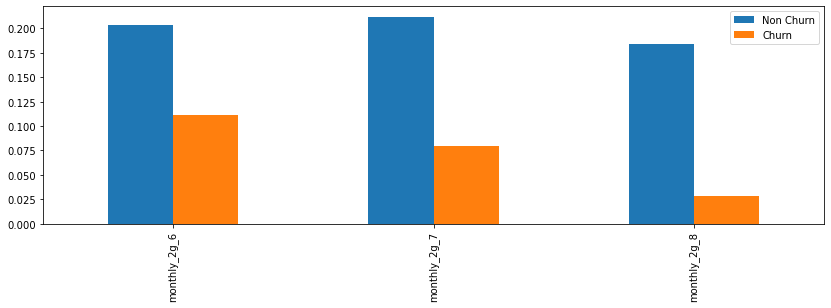

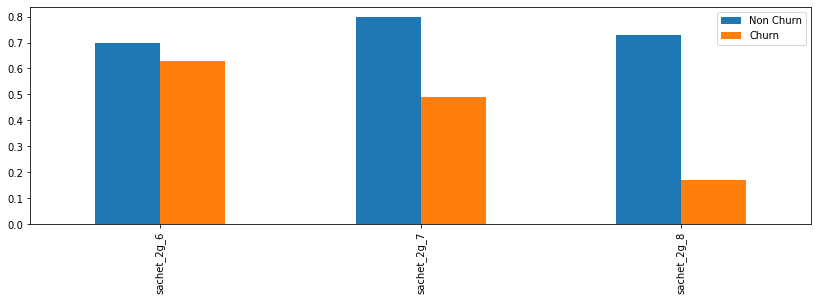

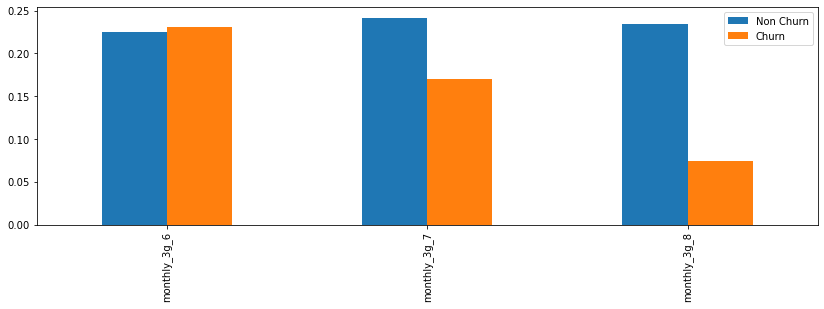

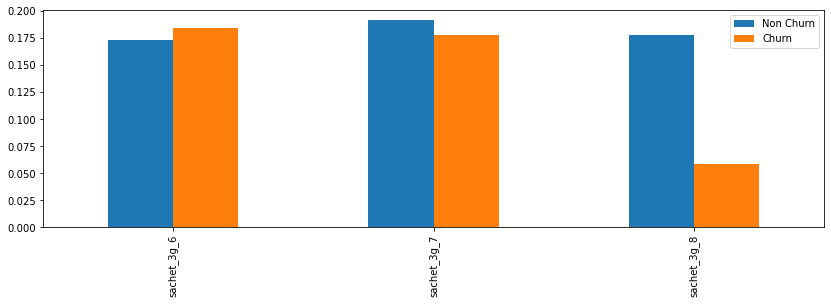

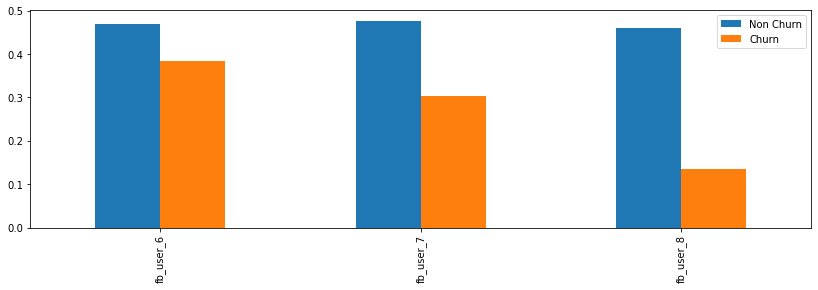

In [171]:
varlist=[]
for var in service_var:
    varlist.append(var)
    if len(varlist) == 3:
        plot_mean_bar_chart(varlist)
        varlist=[]

<span style='background:yellow'> Churn customers can be seen to reduce their purchase of various call and data related schemes over the months. This is also a trend which indicates a customer might churn soon.
</span>

#### Visualising Time Related Variables

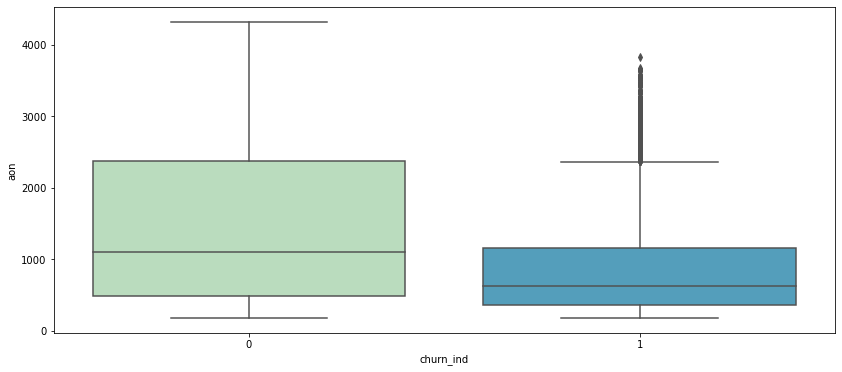

In [172]:
# create bar chart for 6th, 7th and 8th month for duration of time the customers are with the network provider
plt.figure(figsize=(14,6))
sns.boxplot(data=churn_df, y='aon',x='churn_ind',palette=("GnBu"))
plt.show()

In [173]:
churn_only = churn_df.loc[churn_df['churn_ind']==1]

In [174]:
non_churn_only = churn_df.loc[churn_df['churn_ind']==0]

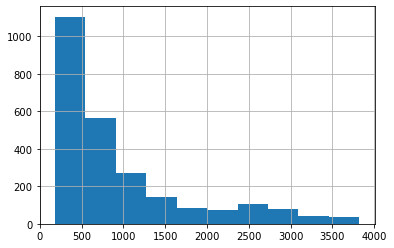

In [175]:
churn_only.aon.hist()

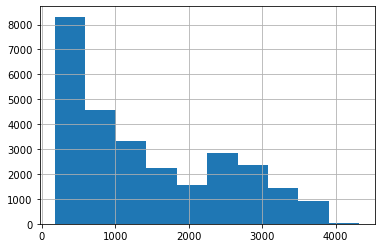

In [176]:
non_churn_only.aon.hist()

<span style='background:yellow'> Customers who are on the network for a very long time, basically are not inclined to churn. The plots show a very high distribution for customers who 
</span>

As we have a lot of numeric variables, we will use a corelaton matrix to check multi collinearity

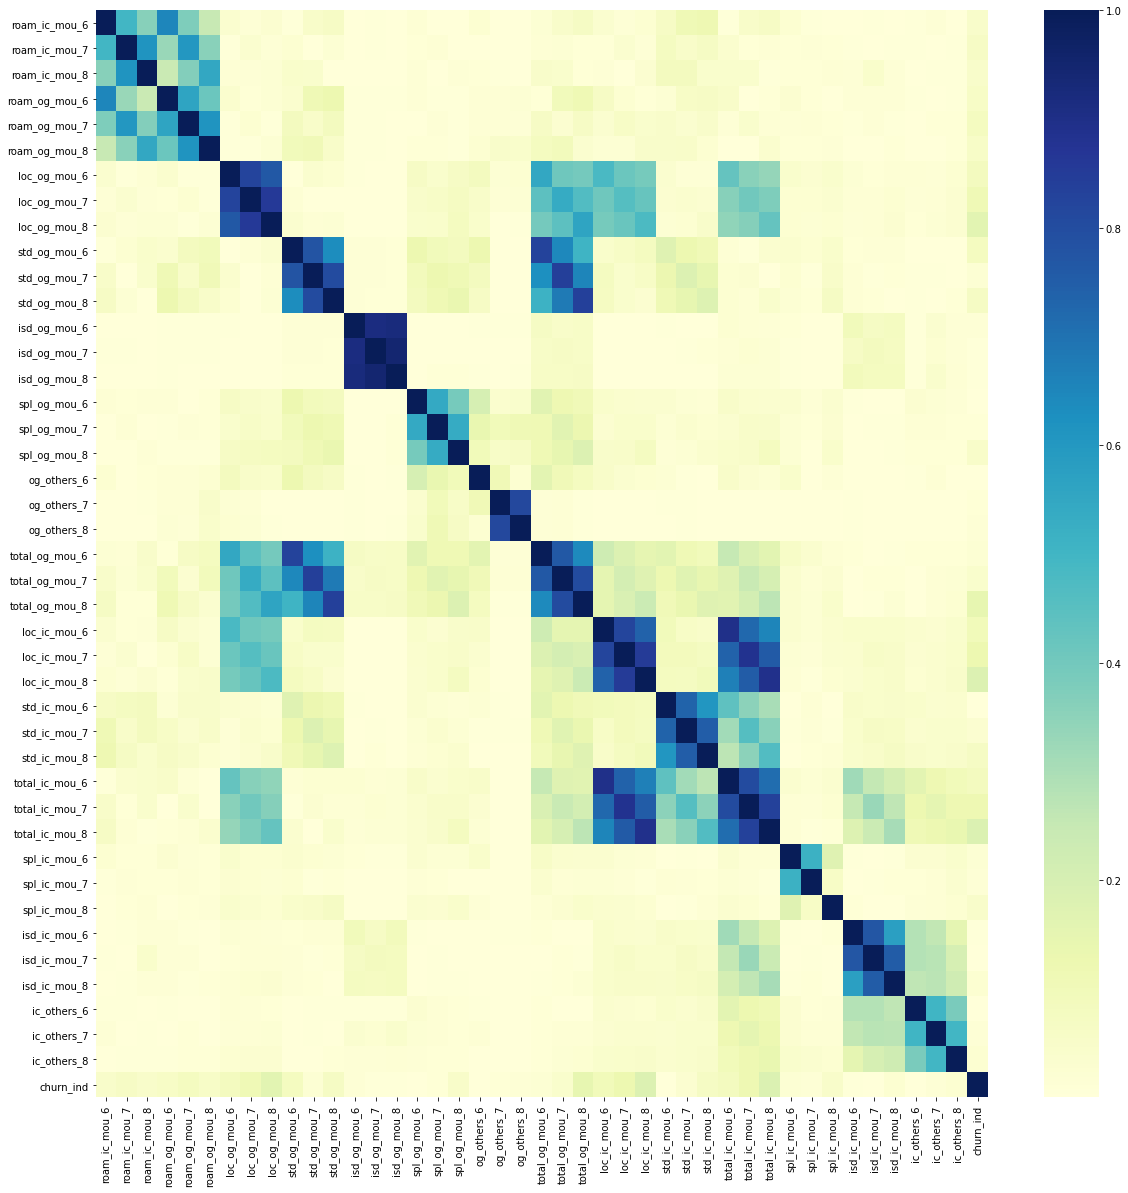

In [177]:
# Co-relation based on Calls
plt.figure(figsize = (20, 20))
sns.heatmap(abs(churn_df[call_var].corr()), cmap="YlGnBu")
plt.show()

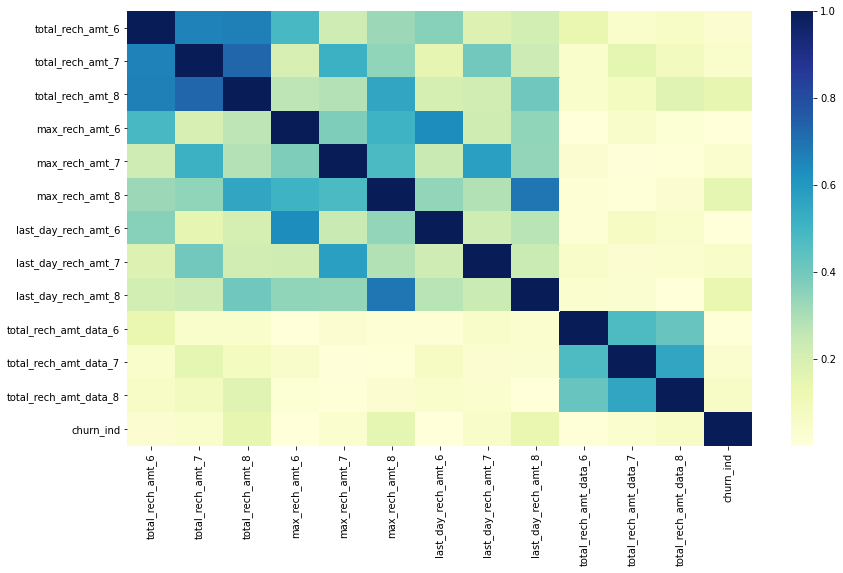

In [178]:
# Co-relation based on Recharge
plt.figure(figsize = (14, 8))
sns.heatmap(abs(churn_df[recharge_var].corr()), cmap="YlGnBu")
plt.show()

As expected, we can see a high co-relation between the various components for incoming, outgoing calls and the recharges with the total of those components.

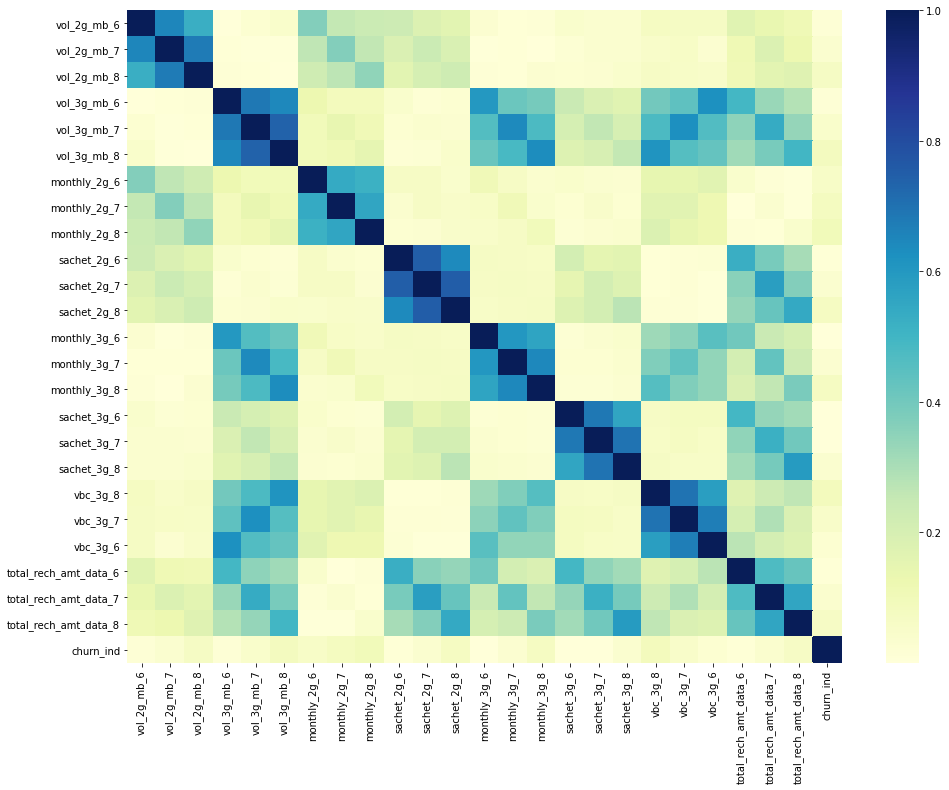

In [179]:
# Co-relation based on Data
plt.figure(figsize = (16, 12))
sns.heatmap(abs(churn_df[data_var].corr()),cmap="YlGnBu")
plt.show()

As expected, we can see a high co-relation between the various components which make up the total data usage and the total value

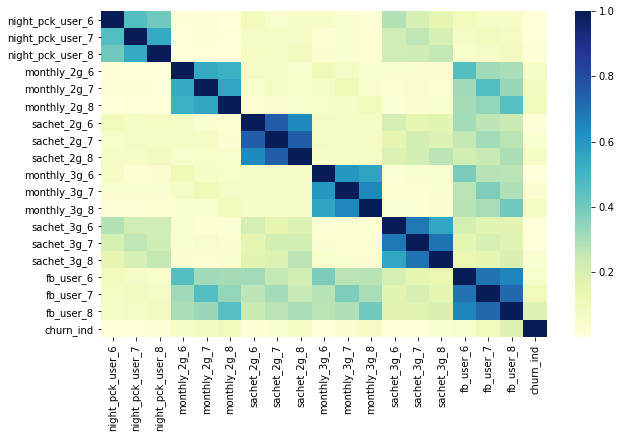

In [180]:
# Co-relation based on Service
plt.figure(figsize = (10,6))
sns.heatmap(abs(churn_df[service_var].corr()), cmap="YlGnBu")
plt.show()

<span style='color:red'> **The corelation between all the variables will be taken care while we implement PCA for dimensionality reduction before building the models.** </span>

## Step 4: Data Preparation

### Dividing into X and Y sets for the model building

In [181]:
# We specify this so that the train and test data set always have the same rows whenever it is split
np.random.seed(0)

# Split 
y=churn_df.pop('churn_ind')

# We will split the original dataset to 70% training data and 30% test data
X_train,X_test,y_train,y_test = train_test_split(churn_df,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [182]:
# Check rows and columns in Train dataset
X_train.shape

(21028, 88)

In [183]:
# Check rows and columns in Test dataset
X_test.shape

(9012, 88)

### Rescaling the Features 

We will use Standard Scaler to bring all columns to scale with mean 0 and S.D of 1

In [184]:
# save the list of columns, so that we can build the 'X_train' and 'X_test' dataframes again with the right columns
col_list = list(X_train.columns)

In [185]:
# Instantiate Standard Scaler
scaler = StandardScaler()

In [186]:
# Fit scaler to all the columns of Train set
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [187]:
# Apply scaler transformation to all the columns of test set
X_test = pd.DataFrame(scaler.transform(X_test))

In [188]:
# Map the column names to the scaled dataframe
X_train.columns=col_list
X_test.columns=col_list

In [189]:
# Verify the number of rows and columns again
X_train.shape

(21028, 88)

### Handling outliers in training dataset

Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

In [190]:
# identify outliers in the training dataset using Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [191]:
# select all rows in X_train that are not outliers
mask = yhat != -1
X_train = X_train[mask]

In [192]:
# select all rows in y_train that are not outliers
y_train = y_train[mask]

In [193]:
X_train.shape

(18925, 88)

In [194]:
y_train.shape

(18925,)

In [195]:
# Check if any column has only 1 unique value as we have removed outlier rows
X_train.nunique().sort_values()

night_pck_user_6             2
fb_user_8                    2
fb_user_7                    2
fb_user_6                    2
night_pck_user_8             2
night_pck_user_7             2
monthly_2g_6                 4
monthly_2g_8                 5
monthly_2g_7                 5
monthly_3g_8                 6
monthly_3g_6                 6
monthly_3g_7                 7
sachet_3g_6                 13
sachet_3g_7                 14
sachet_3g_8                 14
sachet_2g_7                 22
sachet_2g_6                 22
sachet_2g_8                 23
og_others_7                 60
og_others_8                 63
spl_ic_mou_7                70
spl_ic_mou_8                72
spl_ic_mou_6                72
max_rech_amt_7             147
last_day_rech_amt_7        147
last_day_rech_amt_6        149
max_rech_amt_6             154
last_day_rech_amt_8        154
max_rech_amt_8             157
og_others_6                477
isd_og_mou_8               483
isd_og_mou_7               589
isd_og_m

### Handling Class imbalance in Training Dataset

In [196]:
# Percentage of Churn customers in train set
print(color.RED+str((y_train.sum()/len(y_train))*100)+color.END)

8.64993394980185


In [197]:
# Percentage of Churn customers in test set
print(color.BLUE+str((y_test.sum()/len(y_test))*100)+color.END)

8.466489125610298


We will use class weights for handling the unbalanced classes. These weights will be assigned to the classes during model building process.

Class weights are computed as follows:
######                              total number of samples / (number of classes * number of samples in the class)

In [198]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print("Class Weight for "+ color.BOLD +"'class 0' : ",color.RED+str(class_weights[0])+color.END)
print("Class Weight for "+ color.BOLD +"'class 1' : ",color.BLUE+str(class_weights[1]))  

Class Weight for 'class 0' :  0.5473449791763073
Class Weight for 'class 1' :  5.780390959071473


In [199]:
# Optimal weight to be used while building the models
y_weight = {0:0.5,1:6}

## Step 5 : Model Building for Prediction


### Dimensionality Reduction - PCA 

In [200]:
# Run PCA to identify components which can explain 95% of the variance in the data
pca = PCA(0.95,random_state=100)

# Apply PCA on the Training Data
pca.fit(X_train)

PCA(n_components=0.95, random_state=100)

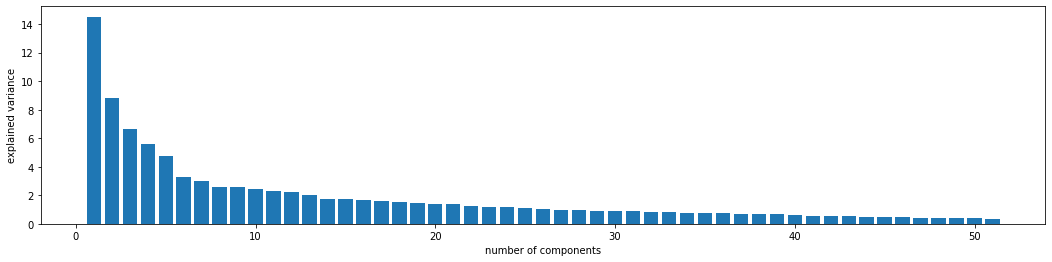

In [201]:
# Plot the Variance explained by each Principal component
plt.figure(figsize = (18,4))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), (pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

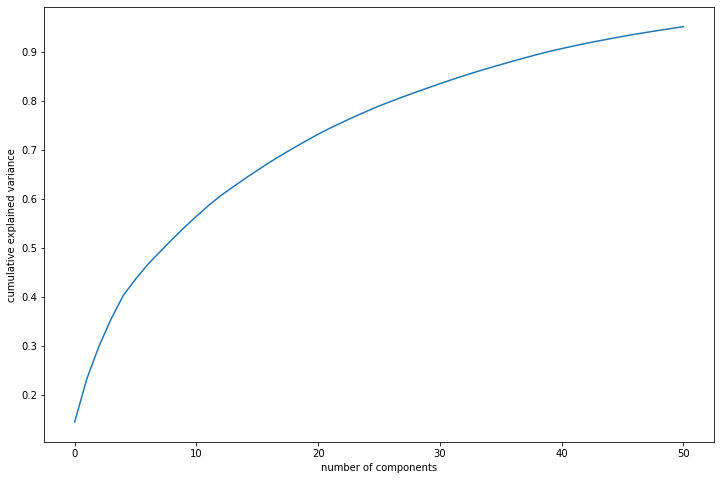

In [202]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above scree plot we can see that 51 principal components are sufficient to explain 95% variance in the data.
We will use these 51 components for our model building

In [203]:
#Apply the PCA tranformation on the training set to create the new dimensions(principal components)
X_train_pca =pd.DataFrame(pca.transform(X_train))

In [204]:
#Apply the PCA tranformation on the test set to create the new dimensions(principal components)
X_test_pca =pd.DataFrame(pca.transform(X_test))

In [205]:
X_train_pca.shape

(18925, 51)

In [206]:
X_test_pca.shape

(9012, 51)

Let us check for the collinearity between the new dimensions of our training dataset to be used for model building

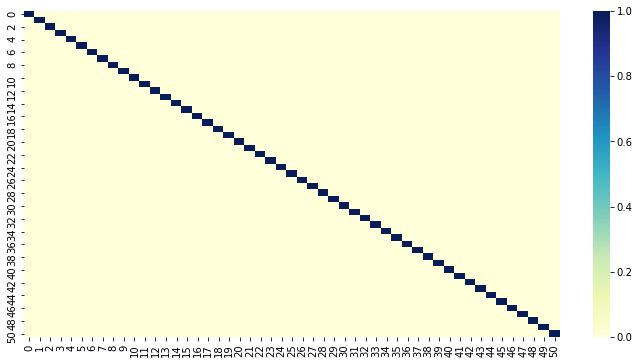

In [207]:
plt.figure(figsize=(12,6))
sns.heatmap(abs(X_train_pca.corr()), cmap="YlGnBu")

<span style='background:cyan'>**We can see that there is no collinearity between the principal components and hence the data is good enough to be used for model building**</span>

Define dataframe to capture key metrics for evaluation

In [208]:
metric_train_df = pd.DataFrame(columns=['recall','auc','f1','accuracy','precision'])
metric_test_df = pd.DataFrame(columns=['recall','auc','f1','accuracy','precision'])

#### Define Custom Functions to aid in model building process

<span style='color:Red'> Our primary objective here is to identify customers who churn, so that we can take preventive measures to retain those high-value customers.'Recall' will give the measure of how many Churn customers have we correctly predicted among the customers who have actually Churned. </span>

**So, the primary metric we will be using to measure the models would be RECALL**

Other important metrics would be,
* Area Under the ROC Curve, respresented by AUC score
* F1 Score which is a harmonic mean of Precisiona nd Recall
* Accuracy


* To define the CV object using RandomizedSearch
* To fit the CV object on the Training data
* Display the  hyperparameters which provide the best result after Cross validatiom\
* Plot the results of the cross validation

In [209]:
def run_cv(model,param_grid):
    # specify number of folds
    folds = 3
    
    # set up cross validation for the passed model
    model_cv = RandomizedSearchCV(estimator = model, 
                        param_distributions = param_grid, 
                        scoring='recall', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True,
                        refit = True,
                        n_jobs=-1,
                        random_state=42)
    # fit CV model on Training data
    model_cv.fit(X_train_pca, y_train)

    print(" The highest test recall score is {0} at = {1}".format(model_cv.best_score_, model_cv.best_params_))
    
    plot_cv_results(model_cv,param_grid)

* To store the Grid Search Cross Validation Results
* Plot each of the hyperparameter for the various values which were tuned

In [210]:
def plot_cv_results(model,param_grid):
    # cv results
    cv_results = pd.DataFrame(model.cv_results_)
 
    for param in param_grid:
        plt.figure(figsize=(12,4))
        df=pd.DataFrame()
        df['test_mean']=cv_results.groupby('param_'+param)["mean_test_score"].mean()
        df['train_mean']=cv_results.groupby('param_'+param)["mean_train_score"].mean()
        df.reset_index(inplace=True)
        plt.plot(df['param_'+param],df['test_mean'])
        plt.plot(df['param_'+param],df['train_mean'])
        plt.xlabel("tuned values")
        plt.ylabel('recall')
        plt.title(param)
        plt.legend(['test score', 'train score'], loc='lower left')
        plt.xscale('log')
        plt.show()


* To predict the 'y' values based on the best fit model
* Calculate the confusion matrix, print the Classification report with Precision, Recall, F1-score and Accuracy
* To calculate AUC and plot the ROC curve

In [211]:
# This would be called for prediction in Train and Test sets after building the final model

def prediction_metrics(X,actual,model,split):
    # predict y value
    predicted = model.predict(X)
    
    #confusion matrix   
    conf_matrix_train = confusion_matrix(actual,predicted)
    precision = conf_matrix_train[1,1]/(conf_matrix_train[1,1]+conf_matrix_train[0,1])
    recall = conf_matrix_train[1,1]/(conf_matrix_train[1,1]+conf_matrix_train[1,0])
    accuracy = (conf_matrix_train[1,1]+conf_matrix_train[0,0])/(conf_matrix_train[1,1]+conf_matrix_train[0,0]+
                conf_matrix_train[0,1]+conf_matrix_train[1,0])
    f1 = (2*precision*recall)/(precision+recall)
    
    fig, ax = plt.subplots(figsize=(5,4))
    heatmap=sns.heatmap(conf_matrix_train,annot=True,fmt="d",cmap="Greens",
                    xticklabels=['Non-Churn', 'Churn'],yticklabels=['Non-Churn', 'Churn'])
    ax.set_ylim([0,2])
    plt.ylabel('Actual ')
    plt.xlabel('Predicted ')
    plt.title('Confusion Matrix')
    plt.show()

    #f1, accuracy, precision,recall report
    print(color.BOLD+'Classification Report : '+color.END)
    print(classification_report(actual,predicted))
    
    #Plot ROC curve & AUC score
    probs = model.predict_proba(X)
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve & AUC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Obtain model name from the model object, so that we can add it to the metric dataframe for model evaluation
    model_name = str(model).split('(')[0]
    if split == 'train':
        metric_train_df.loc[model_name]= [recall,auc_score,f1,accuracy,precision]
    else:
        metric_test_df.loc[model_name]= [recall,auc_score,f1,accuracy,precision]

### Model 1 - Logistic Regression

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.9s finished


 The highest test recall score is 0.8576536613233862 at = {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 50, 'dual': False, 'C': 2.5}


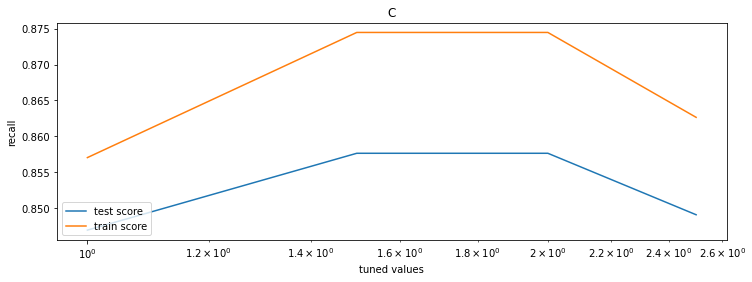

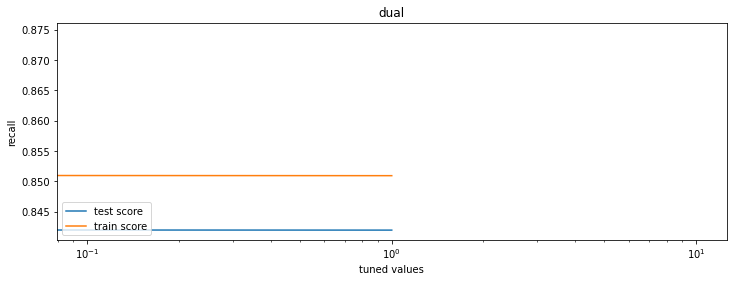

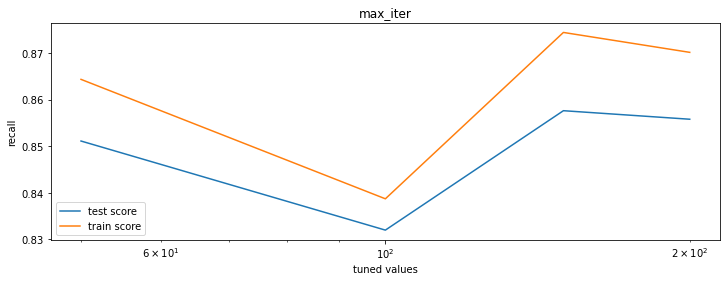

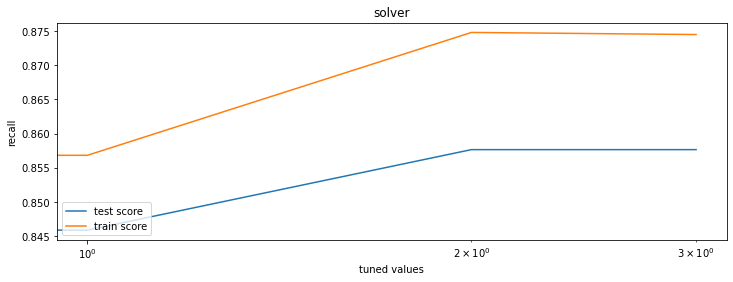

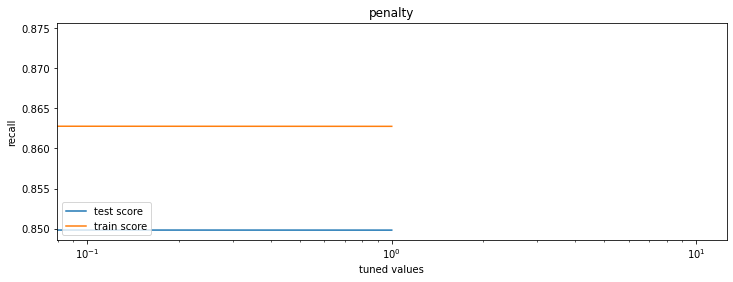

In [212]:
# specify params for tuning
param_rand_lr = {"C": [1.0,1.5,2.0,2.5],
                 'dual':[True,False],
                 'max_iter':[50,100,150,200],
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga'],
                 'penalty':['l1','l2']}

# Instantiate model with the class weight calculated earlier
lr = LogisticRegression(random_state=42,class_weight=y_weight)

#Execute cross validation for logistic regression
run_cv(lr,param_rand_lr)

#### Best fit Logistic Regression model

Run the final model using the optimal value for each hyper-parameter identified by cross-validation

In [213]:
model_logreg_final = LogisticRegression(random_state=42,class_weight=y_weight,
                           solver= 'lbfgs',
                            penalty= 'l2',
                            max_iter= 150,
                            dual= False,
                            C= 1.5)

# fit the model on training data
model_logreg_final.fit(X_train_pca, y_train)

LogisticRegression(C=1.5, class_weight={0: 0.5, 1: 6}, max_iter=150,
                   random_state=42)

#### Logistic Regression - Predictions and Metrics for Train Set

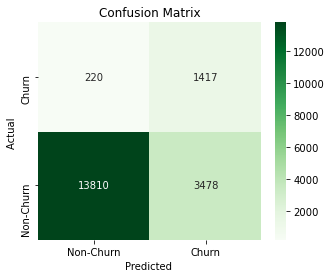

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     17288
           1       0.29      0.87      0.43      1637

    accuracy                           0.80     18925
   macro avg       0.64      0.83      0.66     18925
weighted avg       0.92      0.80      0.84     18925



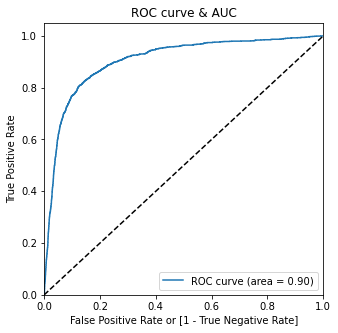

In [214]:
prediction_metrics(X_train_pca, y_train,model_logreg_final,'train')

#### Logistic Regression - Predictions and Metrics for Test Set

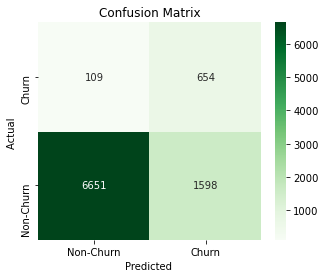

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8249
           1       0.29      0.86      0.43       763

    accuracy                           0.81      9012
   macro avg       0.64      0.83      0.66      9012
weighted avg       0.93      0.81      0.85      9012



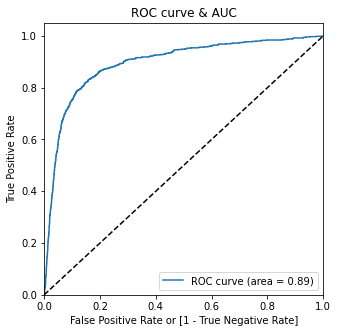

In [215]:
prediction_metrics(X_test_pca, y_test,model_logreg_final,'test')

### Model 2 - SVM

##### Hyperparamter tuning using SVM model

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


 The highest test recall score is 0.8692710958766005 at = {'degree': 3, 'C': 0.01}


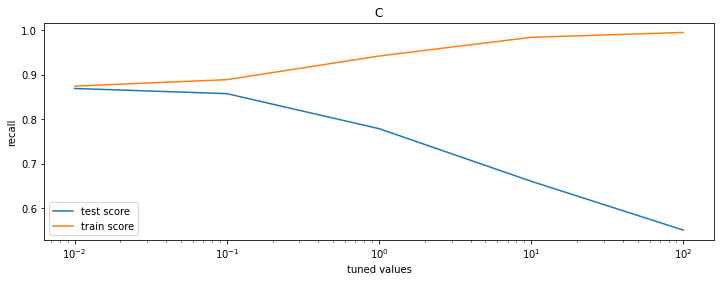

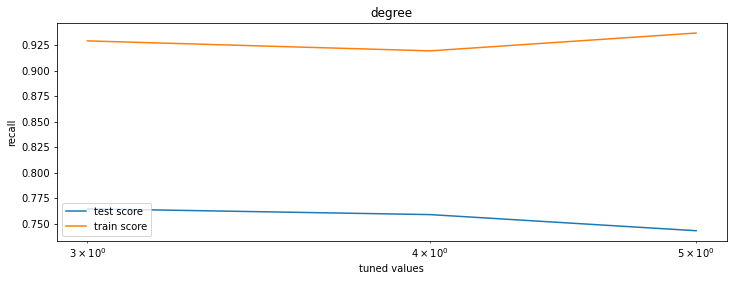

In [216]:
# specify params
param_rand_svm = {"C": [0.01,0.1,1,10,100],
                 'degree':[3,4,5]
                 }

# Instantiate model with the class weight calculated earlier
svm = SVC(class_weight = y_weight)

# Execute cross validation for SVM
run_cv(svm,param_rand_svm)

##### Build best fit SVM model

Run the final model using the optimal value for each hyper-parameter identified by cross-validation

In [217]:
# specify best fit model
model_svm_final = SVC(degree = 3,C = 0.01,probability=True,class_weight=y_weight)

# fit the model on training data
model_svm_final.fit(X_train_pca, y_train)

SVC(C=0.01, class_weight={0: 0.5, 1: 6}, probability=True)

#### SVM - Predictions and Metrics for Train Set

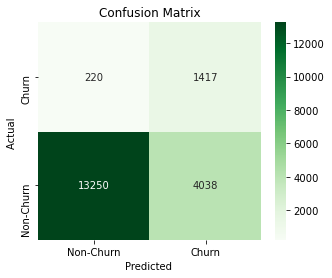

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     17288
           1       0.26      0.87      0.40      1637

    accuracy                           0.78     18925
   macro avg       0.62      0.82      0.63     18925
weighted avg       0.92      0.78      0.82     18925



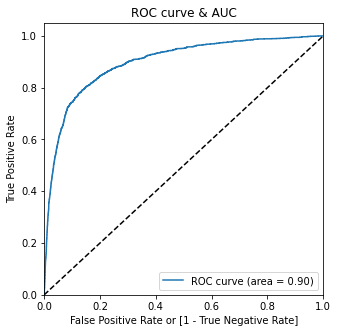

In [218]:
prediction_metrics(X_train_pca,y_train,model_svm_final,'train')

#### SVM predictions and metrics on Test set

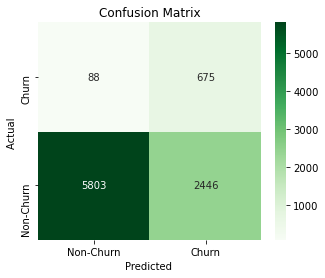

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      8249
           1       0.22      0.88      0.35       763

    accuracy                           0.72      9012
   macro avg       0.60      0.79      0.58      9012
weighted avg       0.92      0.72      0.78      9012



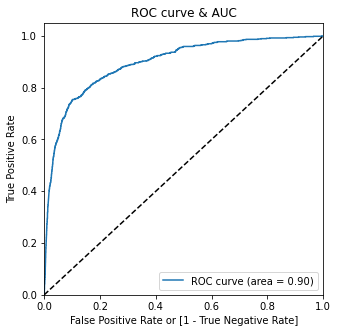

In [219]:
prediction_metrics(X_test_pca, y_test,model_svm_final,'test')

### Model 3 - Random Forest

##### Hyperparamter tuning using Random Forest model

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


 The highest test recall score is 0.8216307647500308 at = {'n_estimators': 500, 'min_samples_split': 600, 'min_samples_leaf': 1000, 'max_features': 10, 'max_depth': 18}


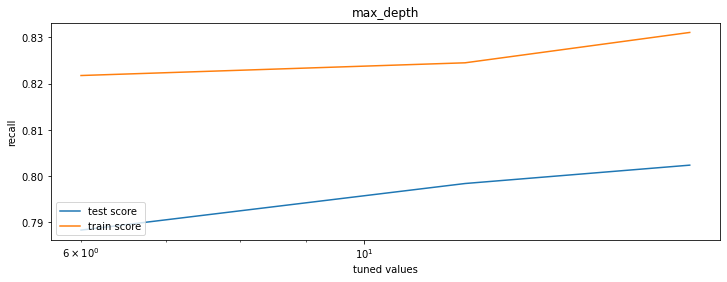

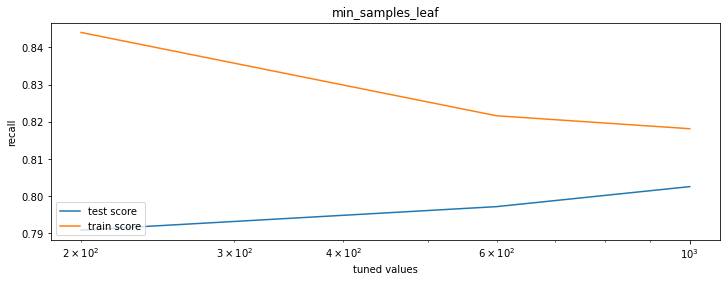

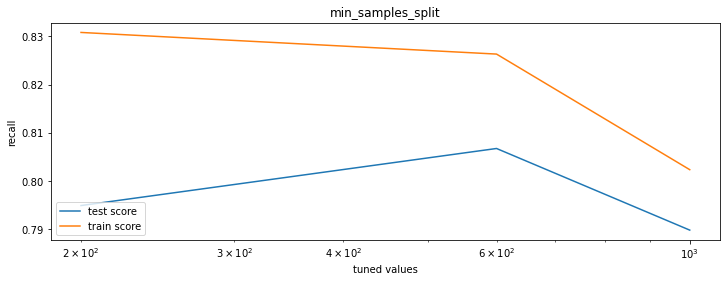

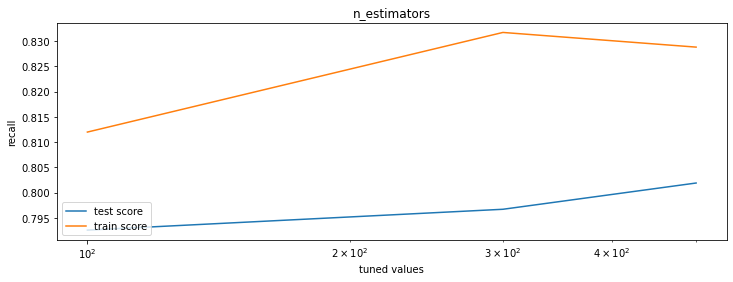

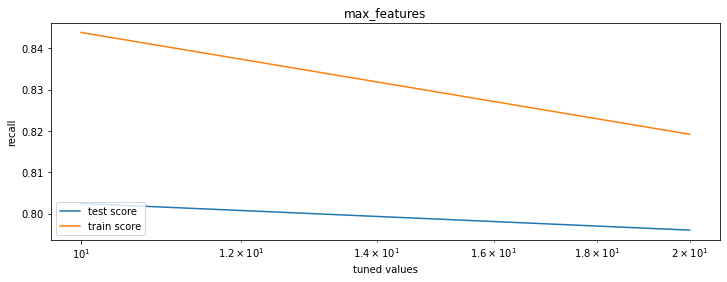

In [220]:
# Create the parameters to tune for Random Forest model
param_rand_rf = {
    'max_depth': [6,12,18],
    'min_samples_leaf': [200,600,1000],
    'min_samples_split': [200,600,1000],
    'n_estimators': [100,300,500], 
    'max_features': [10,20]
}

# Create a random forest based model
rf = RandomForestClassifier(class_weight = y_weight,random_state=42)

# Execute cross validation for Random Forest
run_cv(rf,param_rand_rf)

##### Build best fit Random Forest model

Run the final model using the optimal value for each hyper-parameter identified by cross-validation

In [221]:
# specify best fit model
model_rf_final = RandomForestClassifier(max_features=10,max_depth = 18, min_samples_leaf= 1000,min_samples_split= 600,
                                        n_estimators= 500,class_weight=y_weight,n_jobs=-1,random_state=42)
# fit the model on training data
model_rf_final.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 6}, max_depth=18,
                       max_features=10, min_samples_leaf=1000,
                       min_samples_split=600, n_estimators=500, n_jobs=-1,
                       random_state=42)

##### Random Forest - Prediction and Metrics on Train set

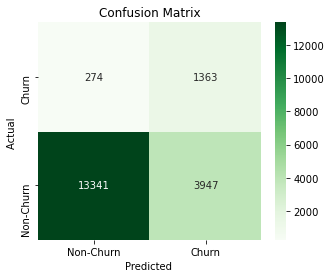

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     17288
           1       0.26      0.83      0.39      1637

    accuracy                           0.78     18925
   macro avg       0.62      0.80      0.63     18925
weighted avg       0.92      0.78      0.82     18925



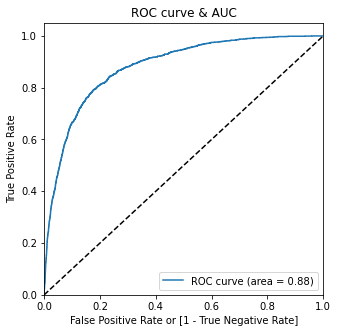

In [222]:
prediction_metrics(X_train_pca, y_train,model_rf_final,'train')

##### Random Forest - Prediction and Metrics on Test set

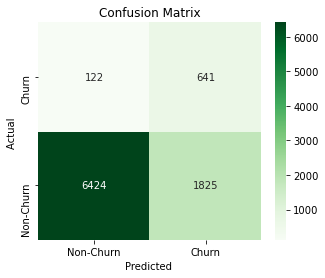

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8249
           1       0.26      0.84      0.40       763

    accuracy                           0.78      9012
   macro avg       0.62      0.81      0.63      9012
weighted avg       0.92      0.78      0.83      9012



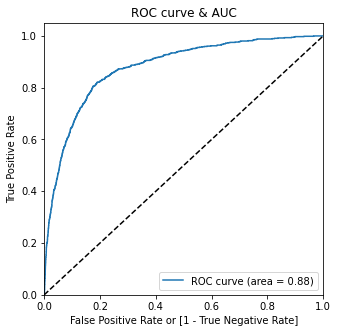

In [223]:
prediction_metrics(X_test_pca, y_test,model_rf_final,'test')

### Model 4 - XGBoost

###### hyperparameter tuning with XGBoost

To apply class weights to XGBoost model we have to pass parameter to **scale_pos_weight**. An ideal weight would be the inverse of the ratio of the number of samples.

Since we have 1736 samples for class '1'(Churn) and 19292 samples for  class '0'(Non-churn), the ratio of Churn class to Non-churn class is 1736:19292 which comes to around **1:11**.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


 The highest test recall score is 0.7348713467979523 at = {'subsample': 0.9, 'n_estimators': 300, 'learning_rate': 0.01}


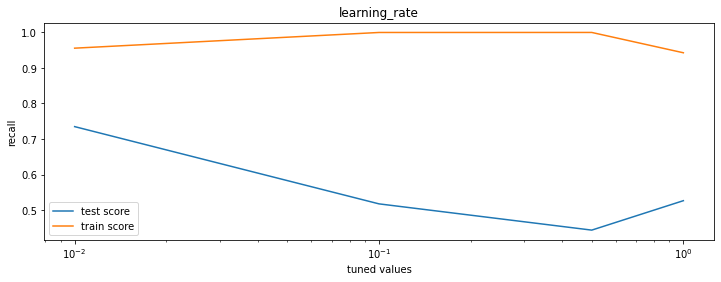

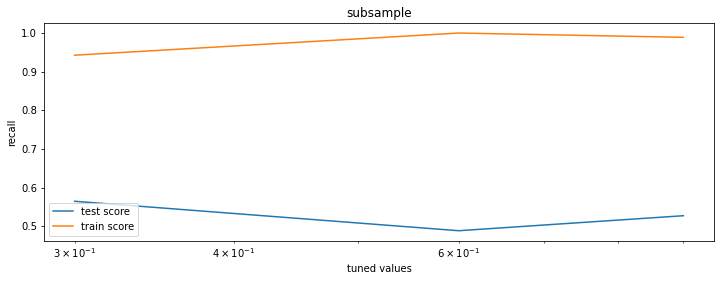

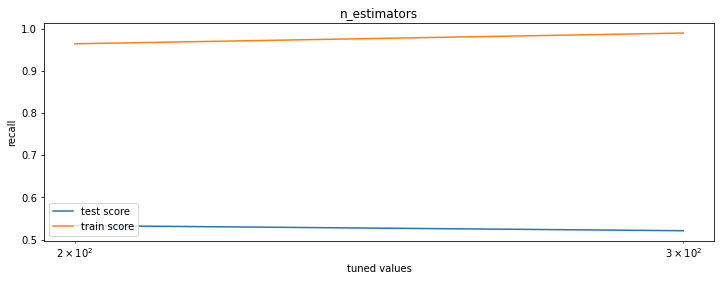

In [224]:
# specify range of hyperparameters
param_rand_xgb = {'learning_rate': [0.01,0.1,0.5,1], 
             'subsample': [0.3,0.6, 0.9],
             'n_estimators' : [100,200,300]
             }          

# specify model
xgb = XGBClassifier(random_state=42,scale_pos_weight=11)

# Execute cross validation for SVM
run_cv(xgb,param_rand_xgb) 

##### Build best fit XGboost model

Run the final model using the optimal value for each hyper-parameter identified by cross-validation

In [225]:
#Specify best fit model
model_xg_final = XGBClassifier(n_estimators=100,learning_rate=0.1,subsample=0.9,scale_pos_weight=11,n_jobs=-1,
                              random_state=42)
# fit the model on training data
model_xg_final.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### XGBoost - Prediction and Metrics on Train set

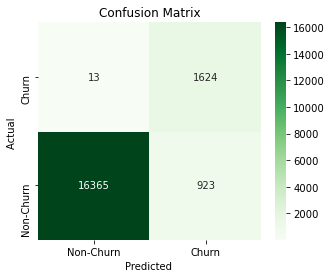

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     17288
           1       0.64      0.99      0.78      1637

    accuracy                           0.95     18925
   macro avg       0.82      0.97      0.87     18925
weighted avg       0.97      0.95      0.96     18925



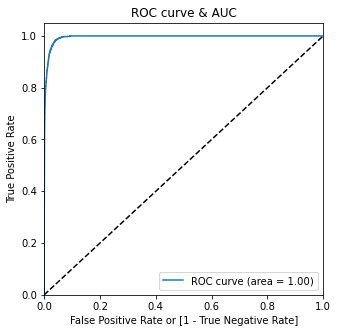

In [226]:
prediction_metrics(X_train_pca, y_train,model_xg_final,'train')

##### XGBoost - Prediction and Metrics on Test set

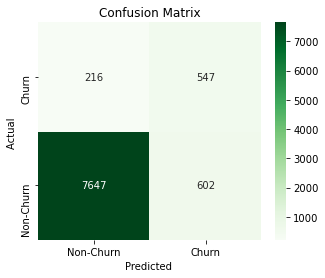

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8249
           1       0.48      0.72      0.57       763

    accuracy                           0.91      9012
   macro avg       0.72      0.82      0.76      9012
weighted avg       0.93      0.91      0.92      9012



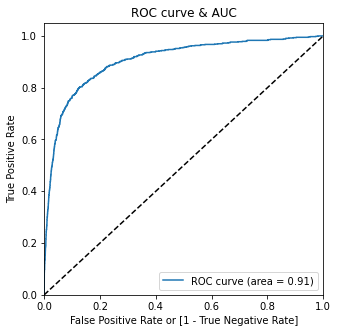

In [227]:
prediction_metrics(X_test_pca, y_test,model_xg_final,'test')

## Step 6 : Predictive Model Evaluation

Let us now display the metrics obtained from various models on the Training and Test datasets and review the model performance

In [228]:
# Display metrics for various models on the Training dataset
metric_train_df

,recall,auc,f1,accuracy,precision
LogisticRegression,0.865608,0.904854,0.433864,0.804597,0.289479
SVC,0.865608,0.897962,0.399605,0.775007,0.259762
RandomForestClassifier,0.832621,0.880890,0.392400,0.776962,0.256685
XGBClassifier,0.992059,0.995449,0.776291,0.950542,0.637613


In [229]:
# Display metrics for various models on the Test dataset
metric_test_df

,recall,auc,f1,accuracy,precision
LogisticRegression,0.857143,0.894782,0.433831,0.810586,0.290409
SVC,0.884666,0.896219,0.347580,0.718819,0.216277
RandomForestClassifier,0.840105,0.877586,0.397027,0.783955,0.259935
XGBClassifier,0.716907,0.905916,0.572176,0.909232,0.476066


* **Logistic Regression :** The Recall value on the Training data is **0.866** whereas on the test set it is **0.857**, which is very good as both are very close.Hence the model has generalised very well. The AUC is around **0.90** on both.
* **Support Vector :** The Recall value on the Training data is **0.866** whereas on the test set it is **0.885**, which is excellent as test score is marginally better than the train score and hence is well regularised. The AUC is around **0.90** on both.
* **Random Forest :** The Recall value on the Training data is **0.832** whereas on the test set it is **0.840**, which is excellent as test score is marginally better than the train score and and hence is well regularised. The AUC is around **0.88** on both.
* **XGB Classifier :** The Recall value on the Training data is **0.874** whereas on the test set it is **0.824**, which is acceptable, but not as good as the other models.

SVM and Random Forest are very good models as their test recall scores are marginally better than their training scores.

But, the preferred model would be the <span style='color:Blue'>**Logistic Regression model**</span>, as along with a very good Test Recall score and AUC, it also has better F1 score and accuracy when compared to SVM and Random forest models.

## Step 7 : Model Building to Identify important features

We will use the Training Dataset(X_train) prior to PCA for identifying the important features

### Define custom functions

Calculate VIF to identify multi collinearity between predictor variables

In [230]:
def calculate_VIF():
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

Run Cross validation for various models

In [231]:
def run_cv_imp(model,param_grid):
    # specify number of folds
    folds = 3
    
    # set up cross validation for the passed model
    model_cv = RandomizedSearchCV(estimator = model, 
                        param_distributions = param_grid, 
                        scoring='recall', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True,
                        refit = True,
                        n_jobs=-1,
                        random_state=42)
    # fit CV model on Training data
    model_cv.fit(X_train_rfe, y_train)

    print(" The highest test recall score is {0} at = {1}".format(model_cv.best_score_, model_cv.best_params_))

### Logistic regression model to identify critical features

In [232]:
# create the RFE oject and select top 15 attributes
rfe = RFE(lr,15)
rfe = rfe.fit(X_train, y_train)

In [233]:
# Creating dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [234]:
#Instantiate Logistic Regression model
model_lr_imp = LogisticRegression(class_weight=y_weight, random_state=42, solver = 'saga', penalty= 'l2', max_iter= 50,
                                  dual= False, C = 2.0)
# fit the model
model_lr_imp.fit(X_train_rfe, y_train)

# get importance of the variables
features = X_train_rfe.columns
coeff = model_lr_imp.coef_[0]
feature_imp_df = pd.DataFrame({'feature':features,'coeff':coeff})
feature_imp_df.set_index('feature',inplace=True)
feature_imp_df['score']=abs(feature_imp_df['coeff'])
feature_imp_df['rank']=feature_imp_df['score'].rank(ascending=False)
feature_imp_df.sort_values(by='rank')

,coeff,score,rank
feature,,,
loc_ic_mou_8,-1.540716,1.540716,1.0
loc_og_mou_8,-1.184386,1.184386,2.0
total_og_mou_8,-0.994147,0.994147,3.0
total_ic_mou_8,-0.990200,0.990200,4.0
total_rech_amt_data_8,-0.801965,0.801965,5.0
fb_user_8,-0.623840,0.623840,6.0
last_day_rech_amt_8,-0.553869,0.553869,7.0
spl_ic_mou_8,-0.532390,0.532390,8.0
total_rech_amt_7,0.527380,0.527380,9.0


In [235]:
# Checck for multi collinearity between the variables
calculate_VIF()

                 Features    VIF
6          total_og_mou_8  58.28
1            offnet_mou_8  28.06
0             onnet_mou_8  21.21
7            loc_ic_mou_8  10.16
8          total_ic_mou_8   9.88
3            loc_og_mou_8   4.56
2            loc_og_mou_7   3.70
11       total_rech_amt_7   1.76
10       total_rech_amt_6   1.40
13              fb_user_8   1.30
14  total_rech_amt_data_8   1.23
12    last_day_rech_amt_8   1.09
4            isd_og_mou_8   1.03
5             og_others_8   1.01
9            spl_ic_mou_8   1.01


In [236]:
# Consider VIF score and Rank and remove the least important variable with high VIF
X_train_rfe.drop('offnet_mou_8',axis=1,inplace=True)
calculate_VIF()

                 Features    VIF
6            loc_ic_mou_8  10.15
7          total_ic_mou_8   9.87
2            loc_og_mou_8   4.56
1            loc_og_mou_7   3.70
5          total_og_mou_8   3.59
0             onnet_mou_8   2.29
10       total_rech_amt_7   1.72
9        total_rech_amt_6   1.40
12              fb_user_8   1.30
13  total_rech_amt_data_8   1.23
11    last_day_rech_amt_8   1.09
3            isd_og_mou_8   1.03
4             og_others_8   1.01
8            spl_ic_mou_8   1.01


In [237]:
# Consider VIF score and Rank and remove the least important variable with high VIF
X_train_rfe.drop('total_ic_mou_8',axis=1,inplace=True)
calculate_VIF()

                 Features   VIF
2            loc_og_mou_8  4.55
1            loc_og_mou_7  3.70
5          total_og_mou_8  3.52
0             onnet_mou_8  2.29
9        total_rech_amt_7  1.71
8        total_rech_amt_6  1.40
6            loc_ic_mou_8  1.39
11              fb_user_8  1.30
12  total_rech_amt_data_8  1.23
10    last_day_rech_amt_8  1.09
3            isd_og_mou_8  1.02
4             og_others_8  1.01
7            spl_ic_mou_8  1.01


The VIF score of all variables are now less than 5. So, we can go ahead and rebuild the model using these variables.

In [238]:
# fit the model
model_lr_imp.fit(X_train_rfe, y_train)

# get importance of the variables
features = X_train_rfe.columns
coeff = model_lr_imp.coef_[0]
feature_imp_df = pd.DataFrame({'feature':features,'coeff':coeff})
feature_imp_df.set_index('feature',inplace=True)
feature_imp_df['score']=abs(feature_imp_df['coeff'])
feature_imp_df['rank']=feature_imp_df['score'].rank(ascending=False)
feature_imp_df.sort_values(by='rank')

,coeff,score,rank
feature,,,
loc_ic_mou_8,-2.477024,2.477024,1.0
total_og_mou_8,-1.184030,1.184030,2.0
loc_og_mou_8,-1.177171,1.177171,3.0
total_rech_amt_data_8,-0.791865,0.791865,4.0
fb_user_8,-0.622926,0.622926,5.0
last_day_rech_amt_8,-0.566803,0.566803,6.0
spl_ic_mou_8,-0.536518,0.536518,7.0
total_rech_amt_6,0.517982,0.517982,8.0
total_rech_amt_7,0.513574,0.513574,9.0


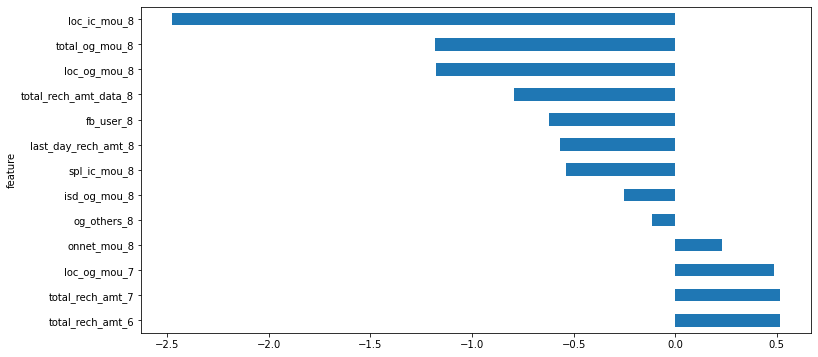

In [239]:
plt.figure(figsize=(12,6))
feature_imp_df['coeff'].sort_values(ascending=False).plot(kind='barh')

Text(0.5, 0, 'Rank')

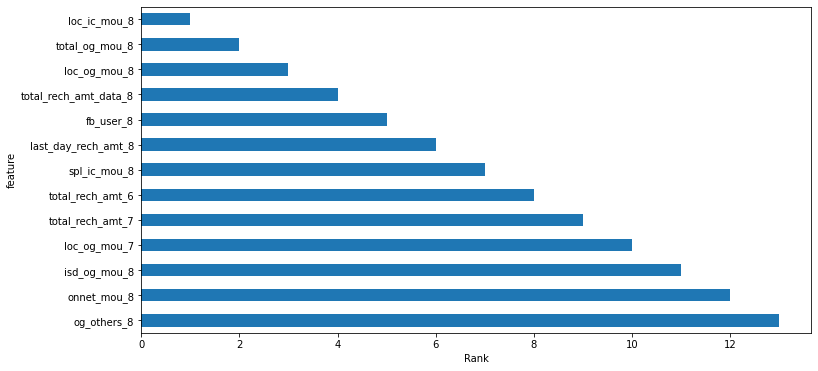

In [240]:
plt.figure(figsize=(12,6))
feature_imp_df['rank'].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Rank')

## Step 8 : Evaluate important features

We can see that the most important features are as follows:
* Reduction in local incoming call minutes compared to previous months
* Reduction in local outgoing call minutes compared to previous months
* Reduction in total outgoing call minutes compared to previous months
* Reduction in total data recharge amount, which means reduction in data usage
* Opting out of schemes to avail services of Facebook and other Social networking sites 

## CONCLUSION

Based on the EDA, we could observe that reduction in incoming and outgoing calls, data usage and not availing of schemes was a major factor of churn and the same result has been obtained from the model evaluation as well.

Reduction in usage of incoming call minutes suggests that either the customer has already started using an alternate number or is in a roaming telecom circle and hence wants to avoid roaming charges. This is corroborated by the high roaming call minutes for Churn customers.

The reduction in outgoing calls could also be a result of the same assumptions.

Hence, the differing trend in Roaming, Std and Isd calls also needs to be considered even though they might not be very significant contributors.

The reduction in data recharge and data usage seems to be primarily due to non availing of FaceBook services, which are predominantly used by younger age group(17-30).

Another clear indicator also seems to be a reduction in purchase of schemes and spike in volume based cost where services are availed as and when required.

Four models were built and all the models gave a recall score in the same range, which proves that the data preparation was good and the models were also very well generalised.

## RECOMMENDATIONS

1) Maintain regular and effective communication with customers. Reach out to potential Churn customers often and obtain feedback on the services provided 

2) Check the reason for reduction in incoming/outgoing calls with the custmer

3) Provide customised tariff plans and value added services to customers based on the response from recommendation(2)

4) Review the Roaming, STD, ISD charges and provide special packages to customers who use it predominantly

5) Explore feasibility to waive of roaming charges for incoming calls

6) Provide unlimited outgoing calls for high-value customers

7) Provide Student Discount on Data services, with special focus on FB/social networking schemes

8) Provide discount on roaming data services to high value customers

9) Ensure that new schemes are communicated to high value customers and proactive information should be given on the plans which will benefit the customer

10) Provide special tariffs combined with discounts on high end phones which are locked in with the telecom provider
